# Preliminaries

## Imports

In [1]:
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)

## Directories etc.

In [2]:
data_save_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta/all_data"
plot_save_path = "C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots"
if not os.path.exists(plot_save_path):
    os.makedirs(plot_save_path)

## Get data etc.

In [3]:
all_data = pd.read_csv(os.path.join(data_save_path, 'all_data.csv'), index_col=0)
all_data_z = pd.read_csv(os.path.join(data_save_path, 'all_data_z.csv'), index_col=0)
all_data_long = pd.read_csv(os.path.join(data_save_path, 'all_data_long.csv'), index_col=0)
all_data_long_z = pd.read_csv(os.path.join(data_save_path, 'all_data_long_z.csv'), index_col=0)

In [4]:
beta_cols = [col for col in all_data_z.columns if 'beta' in col]
beta_cols

['bf_1_over_beta', 'rl_epsilon_1_over_beta', 'ps_1_over_beta']

In [5]:
alpha_cols = [col for col in all_data.columns if 'alpha' in col and 'nalpha' not in col]
alpha_cols

['bf_alpha', 'rl_log_alpha', 'ps_alpha']

In [6]:
nalpha_cols = ['rl_log_nalpha', 'ps_nalpha']  # [col for col in all_data.columns if 'nalpha' in col]
nalpha_cols

['rl_log_nalpha', 'ps_nalpha']

In [7]:
forget_cols = [col for col in all_data.columns if 'forget' in col]
forget_cols

['bf_forget', 'rl_forget']

# Get parameter values for simulation

## Get means, stds, and z's

In [8]:
def get_zs(param_cols):
    
    sub_dat = all_data_z[param_cols].mean(axis=1)
    return np.hstack(len(param_cols) * [np.array(sub_dat)[:, np.newaxis]])

# Test
get_zs(beta_cols)

array([[ 1.21466835e+00,  1.21466835e+00,  1.21466835e+00],
       [-4.45097118e-02, -4.45097118e-02, -4.45097118e-02],
       [-9.30775612e-01, -9.30775612e-01, -9.30775612e-01],
       [ 8.14625291e-01,  8.14625291e-01,  8.14625291e-01],
       [ 7.88443013e-01,  7.88443013e-01,  7.88443013e-01],
       [-1.14614016e+00, -1.14614016e+00, -1.14614016e+00],
       [ 5.96764142e-02,  5.96764142e-02,  5.96764142e-02],
       [-9.44715277e-02, -9.44715277e-02, -9.44715277e-02],
       [ 1.11724656e-01,  1.11724656e-01,  1.11724656e-01],
       [-2.65486981e-01, -2.65486981e-01, -2.65486981e-01],
       [ 3.05242365e-01,  3.05242365e-01,  3.05242365e-01],
       [-2.26182184e-02, -2.26182184e-02, -2.26182184e-02],
       [-1.34936403e+00, -1.34936403e+00, -1.34936403e+00],
       [-8.57824993e-04, -8.57824993e-04, -8.57824993e-04],
       [ 5.06342389e-01,  5.06342389e-01,  5.06342389e-01],
       [ 4.66627089e-01,  4.66627089e-01,  4.66627089e-01],
       [ 8.17112514e-01,  8.17112514e-01

In [9]:
def get_means_stds(param_cols):
    
    mean_dat = all_data[param_cols].mean(axis=0)
    std_dat = all_data[param_cols].std(axis=0)
    
    mean_shaped = np.array(mean_dat)[np.newaxis, :]
    std_shaped = np.array(std_dat)[np.newaxis, :]
    
    return {'means': mean_shaped, 'stds': std_shaped}

# Test
get_means_stds(beta_cols)

{'means': array([[0.09549553, 0.02508382, 0.32572723]]),
 'stds': array([[0.00875198, 0.03248234, 0.14680947]])}

## Put it together: Get all simulated parameter values

In [10]:
all_sim_params = all_data[['ID', 'PreciseYrs']]
for param_cols in (beta_cols, alpha_cols, nalpha_cols, forget_cols):
    
    # Calculate parameters for simulation: average z-scored parameters across tasks (`get_zs`); then rescale to each task
    sim_params = get_means_stds(param_cols)['means'] + get_zs(param_cols) * get_means_stds(param_cols)['stds']
    sim_params = pd.DataFrame(sim_params, columns=param_cols).reset_index(drop=True)
    sim_params['ID'] = all_data['ID']
    
    all_sim_params = pd.merge(all_sim_params, sim_params, on='ID')
    
all_sim_params

ID  PreciseYrs  bf_1_over_beta  rl_epsilon_1_over_beta  ps_1_over_beta  \
0     17    8.657084        0.106126                0.064539        0.504052   
1     18   12.637919        0.095106                0.023638        0.319193   
2     20   14.543463        0.087349               -0.005150        0.189081   
3     22   16.490075        0.102625                0.051545        0.445322   
4     23   11.206023        0.102396                0.050694        0.441478   
..   ...         ...             ...                     ...             ...   
242  465   22.333333        0.096085                0.027270        0.335607   
243  466   20.083333        0.092140                0.012631        0.269444   
244  467   18.750000        0.096408                0.028469        0.341029   
245  468   21.833333        0.099393                0.039549        0.391107   
246  469   19.000000        0.098374                0.035767        0.374010   

     bf_alpha  rl_log_alpha  ps_alpha  rl_log_nalpha  ps_nalpha  bf_forget  \
0    0.179455     -4.061425  0.725704      -4.495354   0.680200   0.088144   
1    0.161154     -4.262572  0.703791      -6.130638   0.554279   0.041121   
2    0.229768     -3.508424  0.785945      -6.209423   0.548212   0.039271   
3    0.205098     -3.779575  0.756407      -5.786723   0.580761   0.053868   
4    0.238323     -3.414396  0.796189      -3.820564   0.732161   0.024010   
..        ...           ...       ...            ...        ...        ...   
242  0.219697     -3.619124  0.773886      -4.907548   0.648460   0.050481   
243  0.378895     -1.869373  0.964498      -3.698022   0.741597   0.118479   
244  0.198693     -3.849976  0.748738      -4.273301   0.697299   0.065767   
245  0.346917     -2.220836  0.926211      -2.488361   0.834744   0.087436   
246  0.220629     -3.608877  0.775002      -7.181705   0.473344   0.057494   

     rl_forget  
0     0.386247  
1     0.104092  
2     0.092996  
3     0.180578  
4     0.001425  
..         ...  
242   0.160255  
243   0.568268  
244   0.251980  
245   0.381996  
246   0.202337  

[247 rows x 12 columns]

In [11]:
# Un-transform transformed parameters
all_sim_params_pd = all_sim_params.copy()
all_sim_params_pd['bf_beta'] = 1 / all_sim_params_pd['bf_1_over_beta']
all_sim_params_pd['ps_beta'] = 1 / all_sim_params_pd['ps_1_over_beta']

all_sim_params_pd['rl_alpha'] = np.exp(all_sim_params_pd['rl_log_alpha'])
all_sim_params_pd['rl_nalpha'] = np.exp(all_sim_params_pd['rl_log_nalpha'])

all_sim_params_pd = all_sim_params_pd.drop(columns=['bf_1_over_beta', 'ps_1_over_beta', 'rl_log_alpha', 'rl_log_nalpha'])
all_sim_params_pd = all_sim_params_pd.rename(columns={'rl_epsilon_1_over_beta': 'rl_epsilon'})

# Add remaining parameters
for col in ['rl_rho', 'rl_K', 'ps_persev', 'bf_nalpha']:
    all_sim_params_pd[col] = all_data[col]

# Save as csv
all_sim_params_pd.to_csv(os.path.join(data_save_path, 'all_sim_params_pd.csv'), index=False)
all_sim_params_pd

ID  PreciseYrs  rl_epsilon  bf_alpha  ps_alpha  ps_nalpha  bf_forget  \
0     17    8.657084    0.064539  0.179455  0.725704   0.680200   0.088144   
1     18   12.637919    0.023638  0.161154  0.703791   0.554279   0.041121   
2     20   14.543463   -0.005150  0.229768  0.785945   0.548212   0.039271   
3     22   16.490075    0.051545  0.205098  0.756407   0.580761   0.053868   
4     23   11.206023    0.050694  0.238323  0.796189   0.732161   0.024010   
..   ...         ...         ...       ...       ...        ...        ...   
242  465   22.333333    0.027270  0.219697  0.773886   0.648460   0.050481   
243  466   20.083333    0.012631  0.378895  0.964498   0.741597   0.118479   
244  467   18.750000    0.028469  0.198693  0.748738   0.697299   0.065767   
245  468   21.833333    0.039549  0.346917  0.926211   0.834744   0.087436   
246  469   19.000000    0.035767  0.220629  0.775002   0.473344   0.057494   

     rl_forget    bf_beta   ps_beta  rl_alpha  rl_nalpha    rl_rho  rl_K  \
0     0.386247   9.422736  1.983922  0.017224   0.011161  1.000000     3   
1     0.104092  10.514586  3.132903  0.014086   0.002175  0.921180     4   
2     0.092996  11.448276  5.288751  0.029944   0.002010  0.871110     5   
3     0.180578   9.744203  2.245566  0.022832   0.003068  0.896900     3   
4     0.001425   9.766009  2.265118  0.032896   0.021915  0.611400     5   
..         ...        ...       ...       ...        ...       ...   ...   
242   0.160255  10.407505  2.979675  0.026806   0.007391  1.000000     3   
243   0.568268  10.853021  3.711343  0.154220   0.024772  0.054827     5   
244   0.251980  10.372610  2.932300  0.021280   0.013936  0.797020     5   
245   0.381996  10.061061  2.556847  0.108518   0.083046  0.894470     5   
246   0.202337  10.165302  2.673729  0.027082   0.000760  0.799870     5   

     ps_persev  bf_nalpha  
0     0.055642          0  
1     0.368237          0  
2     0.459673          0  
3     0.368639          0  
4     0.179675          0  
..         ...        ...  
242   0.529183          0  
243   0.236939          0  
244   0.219977          0  
245   0.580571          0  
246   0.565433          0  

[247 rows x 16 columns]

In [12]:
data_save_path

'C:/Users/maria/MEGAsync/SLCNdata/Meta/all_data'

## Plot parameter values for simulation

In [13]:
sim_long = pd.melt(all_sim_params, id_vars=['ID', 'PreciseYrs'], var_name='param_name', value_name='orig_value')
sim_long

ID  PreciseYrs      param_name  orig_value
0      17    8.657084  bf_1_over_beta    0.106126
1      18   12.637919  bf_1_over_beta    0.095106
2      20   14.543463  bf_1_over_beta    0.087349
3      22   16.490075  bf_1_over_beta    0.102625
4      23   11.206023  bf_1_over_beta    0.102396
...   ...         ...             ...         ...
2465  465   22.333333       rl_forget    0.160255
2466  466   20.083333       rl_forget    0.568268
2467  467   18.750000       rl_forget    0.251980
2468  468   21.833333       rl_forget    0.381996
2469  469   19.000000       rl_forget    0.202337

[2470 rows x 4 columns]

In [14]:
orig_dat = all_data[['ID', 'PreciseYrs'] + alpha_cols + nalpha_cols + beta_cols + forget_cols]
orig_long = pd.melt(orig_dat, id_vars=['ID', 'PreciseYrs'], var_name='param_name', value_name='sim_value')
orig_long

ID  PreciseYrs param_name  sim_value
0      17    8.657084   bf_alpha   0.126558
1      18   12.637919   bf_alpha   0.170546
2      20   14.543463   bf_alpha   0.213005
3      22   16.490075   bf_alpha   0.175447
4      23   11.206023   bf_alpha   0.237062
...   ...         ...        ...        ...
2465  465   22.333333  rl_forget   0.177630
2466  466   20.083333  rl_forget   0.602590
2467  467   18.750000  rl_forget   0.189990
2468  468   21.833333  rl_forget   0.230150
2469  469   19.000000  rl_forget   0.230810

[2470 rows x 4 columns]

In [15]:
sim_orig_dat = pd.merge(sim_long, orig_long, on=['ID', 'PreciseYrs', 'param_name']).reset_index(drop=True)
sim_orig_dat['orig_value'] = sim_orig_dat['orig_value'].astype(float)
sim_orig_dat

ID  PreciseYrs      param_name  orig_value  sim_value
0      17    8.657084  bf_1_over_beta    0.106126   0.103353
1      18   12.637919  bf_1_over_beta    0.095106   0.094833
2      20   14.543463  bf_1_over_beta    0.087349   0.090685
3      22   16.490075  bf_1_over_beta    0.102625   0.101491
4      23   11.206023  bf_1_over_beta    0.102396   0.114793
...   ...         ...             ...         ...        ...
2465  465   22.333333       rl_forget    0.160255   0.177630
2466  466   20.083333       rl_forget    0.568268   0.602590
2467  467   18.750000       rl_forget    0.251980   0.189990
2468  468   21.833333       rl_forget    0.381996   0.230150
2469  469   19.000000       rl_forget    0.202337   0.230810

[2470 rows x 5 columns]

C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-pack

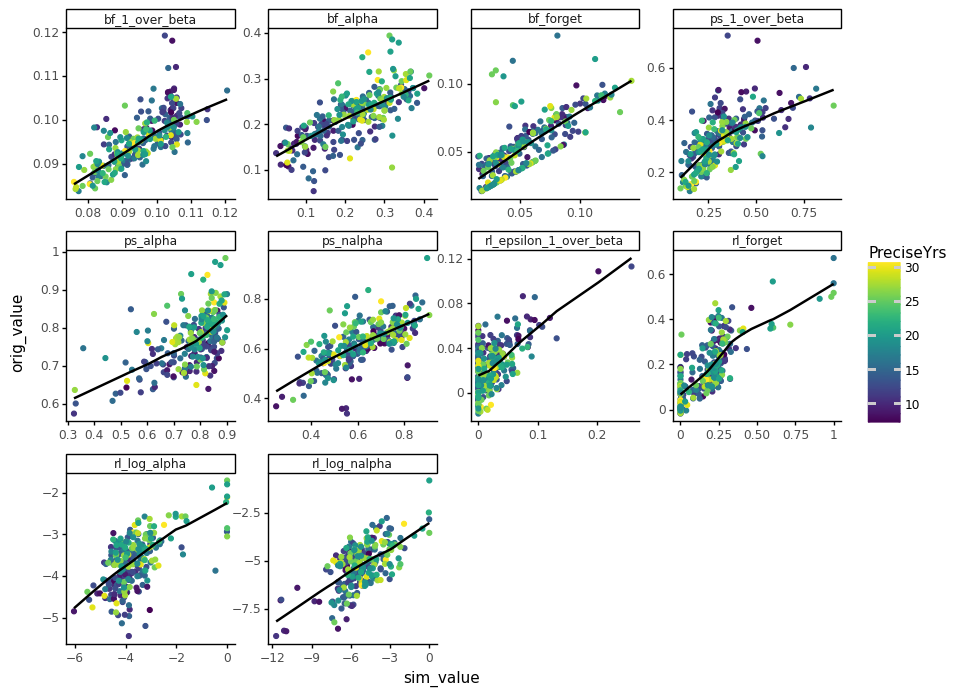

In [16]:
gg.options.figure_size = (10, 8)

g = (gg.ggplot(sim_orig_dat, gg.aes('sim_value', 'orig_value', color='PreciseYrs'))
 + gg.geom_point()
 + gg.geom_smooth()
 + gg.facet_wrap('~ param_name', scales='free')
 + gg.theme(subplots_adjust={'wspace': 0.2, 'hspace': 0.3})
)
print(g)

# Simulate agents on PS

## Imports etc.

In [17]:
from PStask import Task

In [18]:
n_trials = 120
n_sim = len(all_data)
verbose = True
sim_save_dir = 'C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations/'

In [19]:
# Format parameters in the right way
parameters = all_sim_params_pd[['ID'] + [col for col in all_sim_params_pd.columns if 'ps_' in col]]
parameters = parameters.rename(columns={col: col.split('_')[1] for col in parameters.columns[1:]})
parameters['calpha'] = parameters['alpha']
parameters['cnalpha'] = parameters['nalpha']
parameters = parameters.iloc[:n_sim]

In [20]:
def update_Q_sim(
        choice, reward,
        Qs, _,
        alpha, nalpha, calpha, cnalpha,
        n_subj, verbose):

    # if n_trials_back == 0:
    index = np.arange(n_subj), choice
    cindex = np.arange(n_subj), 1 - choice

    # Get reward prediction errors (RPEs)
    RPE = (1 - Qs[index]) * reward  # RPEs for positive outcomes (reward == 1)
    nRPE = (0 - Qs[index]) * (1 - reward)  # RPEs for negative outcomes (reward == 0)

    # Get counterfactual prediction errors (cRPEs)
    cRPE = (0 - Qs[cindex]) * reward  # actual reward was 1; I think I would have gotten 0 for the other action
    cnRPE = (1 - Qs[cindex]) * (1 - reward)  # actual reward 0; would have gotten 1 for the other action

    # Update action taken
    Qs[index] += alpha * RPE + nalpha * nRPE  # add RPE at all pos. outcomes, and nRPE at all neg. outcomes

    # Update counterfactual action
    Qs[cindex] += calpha * cRPE + cnalpha * cnRPE  # add cRPE at all pos. outcomes, and cnRPE at all neg. outcomes

    if verbose:
        print('upd_Q - index: ', index)
        print('upd_Q - cindex: ', cindex)
        print('upd_Q - RPE: ', np.round(RPE, 2))
        print('upd_Q - nRPE: ', np.round(nRPE, 2))
        print('upd_Q - cRPE: ', np.round(cRPE, 2))
        print('upd_Q - cnRPE: ', np.round(cnRPE, 2))
        print('upd_Q - new Qs:\n', np.round(Qs, 2))

    return Qs, _

In [21]:
def p_from_Q_sim(
        Qs,
        prev_choice, prev_reward,
        init_p, n_subj,
        beta, persev,
        verbose):

    # if n_trials_back == 0:
    index0 = np.arange(n_subj, dtype='int32'), 0
    index1 = np.arange(n_subj, dtype='int32'), 1

    # Add perseverance bonus (not permanent)
    Qs0 = Qs[index0]
    Qs1 = Qs[index1]

    Qs0 += (1 - prev_choice) * persev
    Qs1 += prev_choice * persev

    # softmax-transform Q-values into probabilities
    p_right = 1 / (1 + np.exp(list(beta * (Qs0 - Qs1))))  # 0 = left action; 1 = right action
    p_right = 0.0001 + 0.9998 * p_right  # make 0.0001 < p_right < 0.9999

    if verbose:
        print('p_Q - beta: ', np.round(beta, 2))
        print('p_Q - index0: ', index0)
        print('p_Q - index1: ', index1)
        print('p_Q - Q0:\n', np.round(Qs0, 2))
        print('p_Q - Q1:\n', np.round(Qs1, 2))
        print('p_Q - p_right: ', np.round(p_right, 2))

    return p_right

## Set up task and empty dataframes

In [22]:
task_info_path = 'C:/Users/maria/MEGAsync/SLCN/ProbabilisticSwitching/Prerandomized sequences/'
task = Task(task_info_path, n_sim)

In [23]:
rewards = np.zeros((n_trials, n_sim), dtype=int)
choices = np.zeros((n_trials, n_sim), dtype=int)  # human data: left choice==0; right choice==1 (verified in R script 18/11/17)
correct_boxes = np.zeros((n_trials, n_sim), dtype=int)  # human data: left choice==0; right choice==1 (verified in R script 18/11/17)

Qs_trials = np.zeros((n_trials, n_sim, 2))
ps_right = np.zeros((n_trials, n_sim))

## Run and save simulations

In [24]:
for trial in range(n_trials):

    print("\n\tTRIAL {0}".format(trial))
    task.prepare_trial()

    # Initialize Q-values
    if trial <= 2:
        Qs = 0.5 * np.ones((n_sim, 2))  # shape: (n_sim, n_choice)
        _ = 0

    # Update Q-values
    else:
        Qs, _ = update_Q_sim(
            choices[trial - 1], rewards[trial - 1],
            Qs, _,
            parameters['alpha'], parameters['nalpha'], parameters['calpha'], parameters['cnalpha'],
            n_sim, verbose=verbose)

    # Translate Q-values into action probabilities
    if trial < 2:  # need 2 trials' info to access the right p_right
        p_right = 0.5 * np.ones(n_sim)
    else:
        p_right = p_from_Q_sim(
            Qs,
            choices[trial - 1], rewards[trial - 1],
            p_right, n_sim,
            np.array(parameters['beta']), parameters['persev'],
            verbose=verbose)

    # Select an action based on probabilities
    choice = np.random.binomial(n=1, p=p_right)  # produces "1" with p_right, and "0" with (1 - p_right)

    # Obtain reward
    reward = task.produce_reward(choice, replace_rewards=False)

    if verbose:
        print("Qs:\n", np.round(Qs, 2))
        print("p_right:", np.round(p_right, 2))
        print("Choice:", choice)
        print("Reward:", reward)

    # Store trial data
    Qs_trials[trial] = Qs
    ps_right[trial] = p_right
    choices[trial] = choice
    rewards[trial] = reward
    correct_boxes[trial] = task.correct_box


	TRIAL 0
Qs:
 [[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 

upd_Q - nRPE:  [-0.   -0.   -0.   -0.   -0.99 -0.   -0.   -0.   -0.   -0.   -0.99 -0.
 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.68 -0.
 -0.   -0.   -0.   -0.   -0.   -0.   -0.61 -0.   -0.7  -0.   -0.98 -0.
 -0.99 -0.   -0.99 -0.   -0.   -0.   -0.58 -0.   -0.96 -0.   -0.11 -0.
 -0.99 -0.   -0.97 -0.   -0.98 -0.   -0.   -0.   -0.   -0.   -0.96 -0.
 -0.   -0.   -0.74 -0.   -0.66 -0.99 -0.29 -0.   -0.99 -0.   -0.99 -0.
 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.99 -0.61 -0.
 -0.   -0.   -0.98 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -1.   -0.   -0.   -0.   -0.   -0.   -0.   -0.98 -0.   -0.99 -0.
 -0.77 -0.   -0.97 -0.   -0.   -0.   -0.   -0.   -0.97 -0.   -0.62 -0.
 -0.12 -0.   -0.67 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.   -0.   -0.   -0.97 -0.   -0.64 -0.   -0.99 -0.   -0.   -0.
 -0.   -0.99 -0.99 -0.   -0.   -0.   -0.   -0.   -0.   -1.   -

 [0.11 0.89]]
p_Q - beta:  [1.98 3.13 5.29 2.25 2.27 6.35 2.99 3.21 2.92 3.49 2.7  3.1  7.84 3.07
 2.5  2.54 2.24 3.37 2.47 3.44 3.65 4.41 2.28 3.18 5.38 2.77 2.37 3.66
 4.22 3.86 4.02 2.78 3.26 2.47 1.92 2.44 4.11 1.38 3.72 2.68 3.42 2.44
 2.51 1.96 3.03 3.03 3.06 5.15 3.18 2.31 4.65 3.09 2.61 2.47 4.16 2.47
 2.8  2.26 1.42 2.52 2.75 1.97 2.15 2.29 5.41 5.55 1.92 3.33 2.45 2.9
 4.01 1.67 3.27 1.66 4.36 3.6  2.4  2.84 2.67 3.95 3.37 2.94 2.59 2.69
 2.44 2.07 2.52 2.15 2.31 2.34 3.16 2.24 3.18 2.77 3.58 6.19 2.79 2.09
 3.93 4.37 2.93 3.67 3.45 2.17 3.76 2.63 4.36 2.86 3.31 4.27 1.95 3.33
 4.4  2.24 4.45 3.34 2.58 2.1  3.95 2.97 2.42 2.47 2.79 2.56 2.88 2.79
 2.06 3.71 4.12 5.42 2.74 3.   4.43 2.85 3.23 2.32 2.61 3.89 1.94 4.51
 2.05 3.33 2.33 6.47 4.73 3.05 3.56 7.37 3.63 3.66 3.22 3.58 6.13 7.23
 3.76 3.26 3.05 4.97 3.11 3.   2.99 2.54 2.49 3.38 4.65 3.16 3.69 3.21
 6.77 2.2  4.42 2.78 2.08 5.45 2.93 2.72 6.99 2.65 4.41 3.11 4.14 3.53
 4.73 2.93 5.85 4.53 3.79 2.69 3.41 2.55 2.82 4.42 

 [[0.   1.  ]
 [0.92 0.08]
 [0.55 0.45]
 [0.39 0.61]
 [0.99 0.01]
 [0.1  0.9 ]
 [0.66 0.34]
 [0.05 0.95]
 [0.99 0.01]
 [0.78 0.22]
 [0.99 0.01]
 [0.12 0.88]
 [0.   1.  ]
 [0.05 0.95]
 [1.   0.  ]
 [0.8  0.2 ]
 [0.68 0.32]
 [0.06 0.94]
 [0.97 0.03]
 [0.46 0.54]
 [1.   0.  ]
 [0.98 0.02]
 [0.02 0.98]
 [0.02 0.98]
 [1.   0.  ]
 [0.9  0.1 ]
 [1.   0.  ]
 [0.65 0.35]
 [1.   0.  ]
 [0.75 0.25]
 [0.17 0.83]
 [0.35 0.65]
 [1.   0.  ]
 [0.06 0.94]
 [0.84 0.16]
 [0.18 0.82]
 [0.   1.  ]
 [0.98 0.02]
 [1.   0.  ]
 [0.57 0.43]
 [1.   0.  ]
 [0.03 0.97]
 [0.03 0.97]
 [0.76 0.24]
 [0.99 0.01]
 [0.76 0.24]
 [0.01 0.99]
 [0.05 0.95]
 [0.   1.  ]
 [0.88 0.12]
 [1.   0.  ]
 [0.97 0.03]
 [0.97 0.03]
 [0.01 0.99]
 [0.18 0.82]
 [0.32 0.68]
 [0.   1.  ]
 [0.93 0.07]
 [0.75 0.25]
 [0.76 0.24]
 [0.   1.  ]
 [0.98 0.02]
 [0.98 0.02]
 [0.83 0.17]
 [1.   0.  ]
 [0.24 0.76]
 [0.09 0.91]
 [0.73 0.27]
 [0.01 0.99]
 [0.24 0.76]
 [0.01 0.99]
 [0.85 0.15]
 [1.   0.  ]
 [0.16 0.84]
 [0.91 0.09]
 [0.22 0.78]
 [1.   0.  

 0.   0.   0.09 0.   0.17 0.01 0.21 0.   0.21]
upd_Q - nRPE:  [-0.68 -0.87 -0.   -0.03 -0.73 -0.   -0.   -0.   -0.53 -0.31 -0.   -0.97
 -0.32 -0.92 -1.   -0.86 -0.   -0.26 -0.   -0.52 -0.34 -0.   -0.77 -0.
 -0.6  -0.   -0.95 -0.4  -0.56 -0.   -0.4  -0.64 -0.   -0.   -0.47 -0.95
 -0.   -0.   -0.   -0.   -0.   -0.52 -0.2  -0.98 -1.   -0.36 -0.68 -0.75
 -0.85 -0.38 -0.83 -0.   -0.   -0.94 -0.   -0.   -0.23 -0.97 -0.99 -0.
 -0.16 -0.   -0.75 -0.1  -0.9  -0.48 -0.   -0.5  -1.   -0.   -0.35 -0.94
 -0.96 -0.99 -0.51 -0.   -0.73 -0.   -0.   -0.79 -0.   -0.99 -0.99 -0.
 -0.09 -0.   -0.67 -0.   -0.   -0.   -0.9  -0.21 -0.23 -0.   -0.59 -0.
 -0.   -0.   -0.62 -0.76 -0.98 -0.91 -0.7  -0.27 -1.   -0.25 -0.   -0.
 -0.85 -0.41 -0.   -0.24 -0.38 -0.37 -0.   -0.98 -0.79 -0.29 -0.79 -0.77
 -0.   -0.38 -0.85 -0.   -0.93 -0.35 -0.99 -0.98 -0.68 -0.   -0.84 -0.79
 -0.24 -0.36 -0.12 -0.93 -0.54 -0.   -0.47 -1.   -0.72 -0.39 -0.   -1.
 -0.22 -0.   -0.09 -0.35 -0.56 -0.93 -0.77 -0.28 -1.   -0.3  -0.   -0.
 -0

 [0.53 0.47]]
p_Q - beta:  [1.98 3.13 5.29 2.25 2.27 6.35 2.99 3.21 2.92 3.49 2.7  3.1  7.84 3.07
 2.5  2.54 2.24 3.37 2.47 3.44 3.65 4.41 2.28 3.18 5.38 2.77 2.37 3.66
 4.22 3.86 4.02 2.78 3.26 2.47 1.92 2.44 4.11 1.38 3.72 2.68 3.42 2.44
 2.51 1.96 3.03 3.03 3.06 5.15 3.18 2.31 4.65 3.09 2.61 2.47 4.16 2.47
 2.8  2.26 1.42 2.52 2.75 1.97 2.15 2.29 5.41 5.55 1.92 3.33 2.45 2.9
 4.01 1.67 3.27 1.66 4.36 3.6  2.4  2.84 2.67 3.95 3.37 2.94 2.59 2.69
 2.44 2.07 2.52 2.15 2.31 2.34 3.16 2.24 3.18 2.77 3.58 6.19 2.79 2.09
 3.93 4.37 2.93 3.67 3.45 2.17 3.76 2.63 4.36 2.86 3.31 4.27 1.95 3.33
 4.4  2.24 4.45 3.34 2.58 2.1  3.95 2.97 2.42 2.47 2.79 2.56 2.88 2.79
 2.06 3.71 4.12 5.42 2.74 3.   4.43 2.85 3.23 2.32 2.61 3.89 1.94 4.51
 2.05 3.33 2.33 6.47 4.73 3.05 3.56 7.37 3.63 3.66 3.22 3.58 6.13 7.23
 3.76 3.26 3.05 4.97 3.11 3.   2.99 2.54 2.49 3.38 4.65 3.16 3.69 3.21
 6.77 2.2  4.42 2.78 2.08 5.45 2.93 2.72 6.99 2.65 4.41 3.11 4.14 3.53
 4.73 2.93 5.85 4.53 3.79 2.69 3.41 2.55 2.82 4.42 

 [[0.99 0.01]
 [0.01 0.99]
 [0.97 0.03]
 [0.65 0.35]
 [0.06 0.94]
 [1.   0.  ]
 [0.9  0.1 ]
 [0.99 0.01]
 [0.03 0.97]
 [0.14 0.86]
 [0.01 0.99]
 [0.01 0.99]
 [0.38 0.62]
 [1.   0.  ]
 [0.   1.  ]
 [0.03 0.97]
 [0.06 0.94]
 [1.   0.  ]
 [0.11 0.89]
 [0.54 0.46]
 [0.6  0.4 ]
 [0.   1.  ]
 [0.27 0.73]
 [0.12 0.88]
 [0.37 0.63]
 [0.   1.  ]
 [0.01 0.99]
 [0.97 0.03]
 [0.05 0.95]
 [0.   1.  ]
 [0.17 0.83]
 [1.   0.  ]
 [0.04 0.96]
 [0.94 0.06]
 [0.01 0.99]
 [0.01 0.99]
 [0.25 0.75]
 [0.03 0.97]
 [0.21 0.79]
 [0.17 0.83]
 [0.01 0.99]
 [0.66 0.34]
 [0.99 0.01]
 [0.99 0.01]
 [0.09 0.91]
 [0.16 0.84]
 [0.28 0.72]
 [0.99 0.01]
 [0.34 0.66]
 [0.   1.  ]
 [0.14 0.86]
 [0.93 0.07]
 [0.26 0.74]
 [0.33 0.67]
 [0.03 0.97]
 [0.98 0.02]
 [0.91 0.09]
 [0.   1.  ]
 [0.49 0.51]
 [0.9  0.1 ]
 [0.91 0.09]
 [0.03 0.97]
 [0.05 0.95]
 [0.72 0.28]
 [0.65 0.35]
 [0.13 0.87]
 [0.98 0.02]
 [0.14 0.86]
 [0.99 0.01]
 [0.96 0.04]
 [0.35 0.65]
 [0.7  0.3 ]
 [0.15 0.85]
 [0.8  0.2 ]
 [0.74 0.26]
 [0.01 0.99]
 [0.21 0.79

upd_Q - cnRPE:  [0.68 0.95 0.   0.   1.   0.   0.   0.   0.   1.   0.   0.35 0.36 0.
 0.8  0.   0.   0.95 0.09 0.98 0.39 0.98 0.   1.   0.63 0.14 0.   0.
 0.   0.   0.   0.   0.   1.   0.   0.08 0.24 0.   0.   0.51 0.   0.98
 0.   0.39 0.48 0.   0.   0.   0.67 0.97 0.   1.   0.   0.02 0.   0.03
 1.   0.   0.   0.   0.62 1.   0.   1.   0.99 0.   1.   0.5  0.97 0.61
 0.   0.   1.   0.99 0.   0.   0.23 0.   0.   0.54 0.   0.   0.   0.
 0.   0.52 0.   0.   0.   0.   0.   0.   1.   0.58 0.   0.36 0.99 0.
 0.   1.   0.   0.24 0.   0.24 0.   0.94 0.   0.   0.77 0.59 0.   0.99
 0.   0.62 0.   0.   0.   0.   0.   0.77 1.   0.   0.   0.   0.25 0.
 0.   0.   0.89 0.   0.   1.   0.   0.   0.3  0.   0.   0.   0.   0.
 0.36 1.   0.22 0.   0.   1.   0.   0.   0.8  0.97 0.   0.   0.   0.99
 0.   0.   0.47 0.   0.06 0.09 0.68 0.   0.67 0.   0.   0.   0.   1.
 0.   1.   0.   0.   0.   0.   0.   0.   0.   1.   0.   1.   0.76 0.
 0.   0.66 0.85 0.   0.   0.   0.   1.   0.   1.   1.   0.   0.   0.96
 0.46 

p_Q - beta:  [1.98 3.13 5.29 2.25 2.27 6.35 2.99 3.21 2.92 3.49 2.7  3.1  7.84 3.07
 2.5  2.54 2.24 3.37 2.47 3.44 3.65 4.41 2.28 3.18 5.38 2.77 2.37 3.66
 4.22 3.86 4.02 2.78 3.26 2.47 1.92 2.44 4.11 1.38 3.72 2.68 3.42 2.44
 2.51 1.96 3.03 3.03 3.06 5.15 3.18 2.31 4.65 3.09 2.61 2.47 4.16 2.47
 2.8  2.26 1.42 2.52 2.75 1.97 2.15 2.29 5.41 5.55 1.92 3.33 2.45 2.9
 4.01 1.67 3.27 1.66 4.36 3.6  2.4  2.84 2.67 3.95 3.37 2.94 2.59 2.69
 2.44 2.07 2.52 2.15 2.31 2.34 3.16 2.24 3.18 2.77 3.58 6.19 2.79 2.09
 3.93 4.37 2.93 3.67 3.45 2.17 3.76 2.63 4.36 2.86 3.31 4.27 1.95 3.33
 4.4  2.24 4.45 3.34 2.58 2.1  3.95 2.97 2.42 2.47 2.79 2.56 2.88 2.79
 2.06 3.71 4.12 5.42 2.74 3.   4.43 2.85 3.23 2.32 2.61 3.89 1.94 4.51
 2.05 3.33 2.33 6.47 4.73 3.05 3.56 7.37 3.63 3.66 3.22 3.58 6.13 7.23
 3.76 3.26 3.05 4.97 3.11 3.   2.99 2.54 2.49 3.38 4.65 3.16 3.69 3.21
 6.77 2.2  4.42 2.78 2.08 5.45 2.93 2.72 6.99 2.65 4.41 3.11 4.14 3.53
 4.73 2.93 5.85 4.53 3.79 2.69 3.41 2.55 2.82 4.42 3.57 3.65 2.58

 -0.37 -0.03 -0.   -0.   -0.   -0.   -0.  ]
upd_Q - cnRPE:  [0.09 1.   0.97 1.   0.8  0.   0.08 0.   0.   0.   0.35 0.99 0.   0.
 0.   0.98 0.78 0.   0.   0.   0.   1.   1.   0.   0.25 0.   0.99 0.99
 0.   0.   1.   0.   0.   0.   0.   0.   0.   0.99 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   1.   0.98 0.   0.   0.   0.   0.
 0.   0.   0.   0.99 0.38 0.   0.   0.99 0.   0.25 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.92 0.
 0.   0.05 0.   0.   0.   0.   0.   0.   0.   0.   0.24 1.   0.2  0.
 0.49 0.   1.   0.   0.   0.   1.   1.   0.54 0.   0.   1.   0.   0.
 0.   0.   0.36 0.   0.   0.01 0.   0.   0.78 0.   0.   0.   0.4  0.
 0.   1.   0.   0.   0.   0.   0.62 0.   0.   0.56 0.   0.   0.98 0.
 0.   0.   0.   1.   0.   0.   0.   0.   0.   1.   1.   0.   0.   0.
 1.   0.   0.38 0.   0.   0.   0.33 0.   0.   0.   0.   0.5  0.29 0.
 0.   0.   0.43 0.   0.98 0.91 0.   0.   0.   0.   0.51 0.   0.   0.
 0.   0.   0.   0.7  0.99 0.   0.   0.   

 [[1.   0.  ]
 [0.9  0.1 ]
 [0.04 0.96]
 [0.01 0.99]
 [0.01 0.99]
 [0.62 0.38]
 [0.34 0.66]
 [0.12 0.88]
 [0.94 0.06]
 [0.69 0.31]
 [0.77 0.23]
 [0.99 0.01]
 [0.   1.  ]
 [0.3  0.7 ]
 [0.2  0.8 ]
 [0.98 0.02]
 [0.98 0.02]
 [0.74 0.26]
 [0.18 0.82]
 [0.47 0.53]
 [1.   0.  ]
 [0.97 0.03]
 [0.98 0.02]
 [0.42 0.58]
 [1.   0.  ]
 [0.6  0.4 ]
 [0.76 0.24]
 [0.01 0.99]
 [1.   0.  ]
 [0.71 0.29]
 [0.39 0.61]
 [0.   1.  ]
 [0.98 0.02]
 [1.   0.  ]
 [0.25 0.75]
 [0.89 0.11]
 [0.   1.  ]
 [0.02 0.98]
 [0.48 0.52]
 [0.85 0.15]
 [0.94 0.06]
 [0.44 0.56]
 [0.91 0.09]
 [0.11 0.89]
 [0.96 0.04]
 [0.   1.  ]
 [0.05 0.95]
 [0.11 0.89]
 [0.08 0.92]
 [0.69 0.31]
 [0.97 0.03]
 [0.56 0.44]
 [0.6  0.4 ]
 [0.94 0.06]
 [0.41 0.59]
 [0.66 0.34]
 [0.99 0.01]
 [0.22 0.78]
 [0.48 0.52]
 [0.02 0.98]
 [0.   1.  ]
 [0.   1.  ]
 [0.2  0.8 ]
 [0.02 0.98]
 [0.99 0.01]
 [0.96 0.04]
 [1.   0.  ]
 [0.74 0.26]
 [0.19 0.81]
 [0.39 0.61]
 [0.1  0.9 ]
 [0.04 0.96]
 [1.   0.  ]
 [1.   0.  ]
 [0.75 0.25]
 [0.29 0.71]
 [1.   0.  

 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1]

	TRIAL 42
upd_Q - index:  (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165,

 [0.02 0.98]]
p_Q - beta:  [1.98 3.13 5.29 2.25 2.27 6.35 2.99 3.21 2.92 3.49 2.7  3.1  7.84 3.07
 2.5  2.54 2.24 3.37 2.47 3.44 3.65 4.41 2.28 3.18 5.38 2.77 2.37 3.66
 4.22 3.86 4.02 2.78 3.26 2.47 1.92 2.44 4.11 1.38 3.72 2.68 3.42 2.44
 2.51 1.96 3.03 3.03 3.06 5.15 3.18 2.31 4.65 3.09 2.61 2.47 4.16 2.47
 2.8  2.26 1.42 2.52 2.75 1.97 2.15 2.29 5.41 5.55 1.92 3.33 2.45 2.9
 4.01 1.67 3.27 1.66 4.36 3.6  2.4  2.84 2.67 3.95 3.37 2.94 2.59 2.69
 2.44 2.07 2.52 2.15 2.31 2.34 3.16 2.24 3.18 2.77 3.58 6.19 2.79 2.09
 3.93 4.37 2.93 3.67 3.45 2.17 3.76 2.63 4.36 2.86 3.31 4.27 1.95 3.33
 4.4  2.24 4.45 3.34 2.58 2.1  3.95 2.97 2.42 2.47 2.79 2.56 2.88 2.79
 2.06 3.71 4.12 5.42 2.74 3.   4.43 2.85 3.23 2.32 2.61 3.89 1.94 4.51
 2.05 3.33 2.33 6.47 4.73 3.05 3.56 7.37 3.63 3.66 3.22 3.58 6.13 7.23
 3.76 3.26 3.05 4.97 3.11 3.   2.99 2.54 2.49 3.38 4.65 3.16 3.69 3.21
 6.77 2.2  4.42 2.78 2.08 5.45 2.93 2.72 6.99 2.65 4.41 3.11 4.14 3.53
 4.73 2.93 5.85 4.53 3.79 2.69 3.41 2.55 2.82 4.42 

 [0.61 0.39]]
p_right: [0.79 0.02 0.22 0.04 0.66 1.   0.53 0.65 0.05 0.01 0.59 0.88 0.91 0.43
 0.03 0.63 0.73 0.99 0.73 0.19 0.02 0.   0.2  0.99 0.31 0.03 0.32 0.64
 0.6  0.01 0.02 0.04 0.21 0.59 0.39 0.98 0.58 0.22 0.99 0.98 0.01 0.64
 0.63 0.31 0.78 0.21 0.04 0.8  0.99 0.04 0.73 0.01 0.04 0.41 0.75 0.57
 0.89 0.05 0.25 0.23 0.84 0.08 0.09 0.04 0.27 0.04 0.84 0.84 0.96 0.37
 0.39 0.12 0.3  0.91 0.8  0.57 0.43 0.95 0.11 0.72 0.99 0.97 0.96 0.03
 0.36 0.71 0.88 0.81 0.41 0.92 0.96 0.11 0.98 0.91 0.9  0.84 0.97 0.63
 0.68 0.18 0.24 0.02 0.01 0.71 0.57 0.96 0.99 0.03 0.97 1.   0.08 0.66
 0.19 0.11 1.   0.02 0.03 0.29 0.52 0.81 0.4  0.49 0.97 0.1  0.29 0.81
 0.94 0.   0.99 1.   0.5  0.02 1.   0.53 0.48 0.14 0.11 0.01 0.47 0.62
 0.21 0.48 0.86 0.27 1.   0.39 0.36 1.   0.83 0.02 0.28 0.99 0.   0.
 0.01 0.52 0.67 0.8  0.98 0.31 0.52 0.02 0.15 0.95 0.71 0.99 1.   0.01
 0.   0.15 0.   0.99 0.92 1.   0.82 0.02 1.   0.16 0.22 0.21 1.   0.29
 0.76 0.16 1.   0.   1.   0.94 0.68 0.17 0.51 0.49 0.02 

 [0.97 0.03]]
p_Q - beta:  [1.98 3.13 5.29 2.25 2.27 6.35 2.99 3.21 2.92 3.49 2.7  3.1  7.84 3.07
 2.5  2.54 2.24 3.37 2.47 3.44 3.65 4.41 2.28 3.18 5.38 2.77 2.37 3.66
 4.22 3.86 4.02 2.78 3.26 2.47 1.92 2.44 4.11 1.38 3.72 2.68 3.42 2.44
 2.51 1.96 3.03 3.03 3.06 5.15 3.18 2.31 4.65 3.09 2.61 2.47 4.16 2.47
 2.8  2.26 1.42 2.52 2.75 1.97 2.15 2.29 5.41 5.55 1.92 3.33 2.45 2.9
 4.01 1.67 3.27 1.66 4.36 3.6  2.4  2.84 2.67 3.95 3.37 2.94 2.59 2.69
 2.44 2.07 2.52 2.15 2.31 2.34 3.16 2.24 3.18 2.77 3.58 6.19 2.79 2.09
 3.93 4.37 2.93 3.67 3.45 2.17 3.76 2.63 4.36 2.86 3.31 4.27 1.95 3.33
 4.4  2.24 4.45 3.34 2.58 2.1  3.95 2.97 2.42 2.47 2.79 2.56 2.88 2.79
 2.06 3.71 4.12 5.42 2.74 3.   4.43 2.85 3.23 2.32 2.61 3.89 1.94 4.51
 2.05 3.33 2.33 6.47 4.73 3.05 3.56 7.37 3.63 3.66 3.22 3.58 6.13 7.23
 3.76 3.26 3.05 4.97 3.11 3.   2.99 2.54 2.49 3.38 4.65 3.16 3.69 3.21
 6.77 2.2  4.42 2.78 2.08 5.45 2.93 2.72 6.99 2.65 4.41 3.11 4.14 3.53
 4.73 2.93 5.85 4.53 3.79 2.69 3.41 2.55 2.82 4.42 

 0.   0.01 0.11 0.   0.   0.01 0.   0.   0.  ]
upd_Q - nRPE:  [-0.   -0.   -0.2  -0.28 -0.93 -0.   -0.   -0.99 -0.45 -1.   -0.36 -0.
 -0.   -1.   -0.   -0.   -0.   -1.   -0.03 -0.53 -0.   -1.   -0.   -0.
 -0.   -0.   -0.   -0.63 -0.48 -0.   -0.41 -0.   -0.69 -0.94 -0.   -0.9
 -0.25 -0.93 -0.   -0.51 -0.99 -1.   -0.   -0.59 -0.   -0.   -0.   -0.
 -0.7  -1.   -0.   -0.16 -0.97 -0.   -0.   -0.9  -0.67 -0.   -0.   -0.98
 -0.   -0.   -0.   -0.   -0.69 -0.   -0.25 -0.99 -0.   -0.39 -0.   -0.
 -0.   -0.   -0.   -0.   -0.   -0.   -1.   -0.47 -0.   -0.71 -0.   -0.27
 -0.   -1.   -1.   -0.47 -0.   -0.   -0.   -0.35 -0.34 -0.   -0.   -1.
 -0.   -0.   -0.   -0.27 -0.   -0.   -0.   -0.   -0.42 -0.99 -0.46 -0.
 -1.   -1.   -0.   -0.   -0.32 -0.   -0.   -0.31 -0.   -0.   -1.   -1.
 -0.   -0.   -0.   -0.73 -0.15 -0.36 -0.   -0.   -0.   -1.   -0.   -0.83
 -0.05 -0.   -0.68 -0.   -0.74 -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -1.   -1.   -0.   -0.   -0.8  -1.   -0.   -0.06 -0.55 -1.   -0.   -0.
 -0.97 -

 [[0.75 0.25]
 [0.25 0.75]
 [0.   1.  ]
 [1.   0.  ]
 [0.27 0.73]
 [0.28 0.72]
 [0.03 0.97]
 [0.99 0.01]
 [0.11 0.89]
 [0.7  0.3 ]
 [0.99 0.01]
 [0.91 0.09]
 [1.   0.  ]
 [0.99 0.01]
 [0.92 0.08]
 [0.06 0.94]
 [0.22 0.78]
 [0.98 0.02]
 [0.   1.  ]
 [0.14 0.86]
 [0.24 0.76]
 [0.55 0.45]
 [0.34 0.66]
 [0.9  0.1 ]
 [0.37 0.63]
 [0.06 0.94]
 [0.89 0.11]
 [1.   0.  ]
 [0.01 0.99]
 [0.02 0.98]
 [0.   1.  ]
 [0.11 0.89]
 [0.02 0.98]
 [0.01 0.99]
 [0.   1.  ]
 [0.02 0.98]
 [0.94 0.06]
 [0.97 0.03]
 [0.98 0.02]
 [0.01 0.99]
 [0.02 0.98]
 [0.81 0.19]
 [0.16 0.84]
 [0.94 0.06]
 [0.48 0.52]
 [0.36 0.64]
 [0.05 0.95]
 [1.   0.  ]
 [1.   0.  ]
 [0.52 0.48]
 [0.7  0.3 ]
 [0.75 0.25]
 [0.26 0.74]
 [0.64 0.36]
 [0.94 0.06]
 [0.02 0.98]
 [0.97 0.03]
 [0.07 0.93]
 [0.08 0.92]
 [0.21 0.79]
 [1.   0.  ]
 [0.24 0.76]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.88 0.12]
 [0.01 0.99]
 [0.52 0.48]
 [0.81 0.19]
 [0.99 0.01]
 [0.1  0.9 ]
 [0.95 0.05]
 [0.04 0.96]
 [0.63 0.37]
 [0.87 0.13]
 [0.92 0.08]
 [0.   1.  

upd_Q - cRPE:  [-0.   -0.44 -0.55 -0.   -0.03 -0.11 -0.66 -0.12 -0.   -0.69 -0.   -0.03
 -0.04 -0.24 -0.   -0.24 -0.02 -0.74 -0.   -0.   -0.01 -0.   -0.01 -0.11
 -0.   -0.7  -0.01 -0.59 -0.   -0.15 -0.17 -0.1  -0.   -1.   -0.   -0.
 -0.   -0.   -0.   -0.   -0.17 -0.   -0.   -0.03 -0.01 -0.01 -0.   -0.05
 -0.15 -0.   -0.01 -0.01 -0.01 -0.01 -0.06 -0.   -0.   -0.1  -0.   -0.
 -0.   -0.   -0.02 -0.   -0.23 -0.13 -0.   -0.02 -0.04 -0.08 -0.   -0.
 -0.   -0.   -0.   -0.   -0.   -0.23 -0.23 -0.   -0.   -0.73 -0.   -0.
 -0.1  -0.   -0.   -0.05 -0.   -0.01 -0.18 -0.01 -0.   -0.   -0.   -0.
 -0.   -0.   -0.   -0.   -0.   -0.12 -0.   -0.52 -0.   -0.   -0.   -0.
 -0.   -0.07 -0.   -0.07 -0.25 -0.   -0.64 -0.   -0.07 -0.71 -0.   -0.
 -0.   -0.25 -0.   -0.01 -0.6  -0.64 -0.   -0.   -0.   -0.59 -0.01 -0.
 -0.63 -0.02 -0.   -0.   -0.   -0.   -0.   -0.01 -0.   -0.   -0.04 -0.65
 -0.   -0.22 -0.   -0.   -0.   -0.   -0.   -0.16 -0.   -0.   -0.   -0.07
 -0.   -0.   -0.   -0.   -0.   -0.12 -0.11 -0.   -0.

 0.99 0.67 0.34 0.65 0.34 0.71 0.1  0.02 0.97]
Qs:
 [[1.   0.  ]
 [0.95 0.05]
 [0.25 0.75]
 [0.04 0.96]
 [0.73 0.27]
 [0.47 0.53]
 [0.22 0.78]
 [0.3  0.7 ]
 [0.04 0.96]
 [1.   0.  ]
 [0.97 0.03]
 [0.89 0.11]
 [0.38 0.62]
 [0.15 0.85]
 [0.96 0.04]
 [0.   1.  ]
 [0.78 0.22]
 [0.   1.  ]
 [1.   0.  ]
 [0.48 0.52]
 [0.24 0.76]
 [1.   0.  ]
 [0.05 0.95]
 [1.   0.  ]
 [0.06 0.94]
 [1.   0.  ]
 [0.78 0.22]
 [0.75 0.25]
 [0.49 0.51]
 [0.98 0.02]
 [0.05 0.95]
 [0.   1.  ]
 [0.01 0.99]
 [0.99 0.01]
 [1.   0.  ]
 [0.98 0.02]
 [1.   0.  ]
 [0.11 0.89]
 [0.51 0.49]
 [0.98 0.02]
 [0.6  0.4 ]
 [0.64 0.36]
 [0.04 0.96]
 [0.5  0.5 ]
 [0.25 0.75]
 [0.03 0.97]
 [0.16 0.84]
 [0.85 0.15]
 [1.   0.  ]
 [0.99 0.01]
 [0.91 0.09]
 [0.62 0.38]
 [0.18 0.82]
 [0.92 0.08]
 [0.4  0.6 ]
 [0.65 0.35]
 [0.97 0.03]
 [0.93 0.07]
 [0.94 0.06]
 [0.62 0.38]
 [1.   0.  ]
 [0.97 0.03]
 [0.8  0.2 ]
 [0.01 0.99]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.78 0.22]
 [0.13 0.87]
 [0.87 0.13]
 [0.66 0.34]
 [0.03 0.97]
 [0.66 0.34]
 [0.06 0.94]

p_Q - beta:  [1.98 3.13 5.29 2.25 2.27 6.35 2.99 3.21 2.92 3.49 2.7  3.1  7.84 3.07
 2.5  2.54 2.24 3.37 2.47 3.44 3.65 4.41 2.28 3.18 5.38 2.77 2.37 3.66
 4.22 3.86 4.02 2.78 3.26 2.47 1.92 2.44 4.11 1.38 3.72 2.68 3.42 2.44
 2.51 1.96 3.03 3.03 3.06 5.15 3.18 2.31 4.65 3.09 2.61 2.47 4.16 2.47
 2.8  2.26 1.42 2.52 2.75 1.97 2.15 2.29 5.41 5.55 1.92 3.33 2.45 2.9
 4.01 1.67 3.27 1.66 4.36 3.6  2.4  2.84 2.67 3.95 3.37 2.94 2.59 2.69
 2.44 2.07 2.52 2.15 2.31 2.34 3.16 2.24 3.18 2.77 3.58 6.19 2.79 2.09
 3.93 4.37 2.93 3.67 3.45 2.17 3.76 2.63 4.36 2.86 3.31 4.27 1.95 3.33
 4.4  2.24 4.45 3.34 2.58 2.1  3.95 2.97 2.42 2.47 2.79 2.56 2.88 2.79
 2.06 3.71 4.12 5.42 2.74 3.   4.43 2.85 3.23 2.32 2.61 3.89 1.94 4.51
 2.05 3.33 2.33 6.47 4.73 3.05 3.56 7.37 3.63 3.66 3.22 3.58 6.13 7.23
 3.76 3.26 3.05 4.97 3.11 3.   2.99 2.54 2.49 3.38 4.65 3.16 3.69 3.21
 6.77 2.2  4.42 2.78 2.08 5.45 2.93 2.72 6.99 2.65 4.41 3.11 4.14 3.53
 4.73 2.93 5.85 4.53 3.79 2.69 3.41 2.55 2.82 4.42 3.57 3.65 2.58

 3.55 4.12 3.47 3.75 2.98 3.71 2.93 2.56 2.67]
p_Q - index0:  (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
 

upd_Q - nRPE:  [-0.68 -0.   -0.   -0.   -0.85 -0.   -0.   -0.16 -0.   -0.   -1.   -1.
 -0.   -0.99 -0.99 -0.   -0.94 -0.   -0.59 -0.4  -0.07 -0.   -0.99 -0.
 -0.   -0.   -0.   -0.59 -0.   -0.   -0.   -0.   -0.   -0.9  -0.   -0.
 -0.77 -0.   -0.28 -0.01 -0.82 -0.66 -0.   -0.   -0.   -0.   -0.64 -0.
 -0.67 -0.   -0.   -0.   -0.72 -0.35 -0.25 -0.   -0.   -0.   -0.5  -0.
 -0.84 -0.   -0.   -0.   -0.65 -0.   -0.   -0.   -0.9  -0.38 -0.   -0.
 -0.   -0.25 -0.98 -0.   -0.   -0.99 -0.06 -0.   -0.98 -0.   -0.   -0.
 -0.09 -0.   -0.   -0.26 -0.   -0.   -0.21 -0.   -0.67 -0.75 -0.   -1.
 -0.   -0.79 -0.   -0.   -0.   -0.83 -0.99 -0.51 -0.16 -0.66 -0.99 -0.
 -0.   -0.   -0.01 -0.   -0.   -0.64 -0.94 -0.   -0.   -0.93 -0.   -1.
 -0.99 -0.   -0.24 -0.   -0.1  -0.88 -0.   -0.   -0.   -0.   -0.   -0.
 -0.34 -0.36 -0.   -0.09 -0.   -0.   -0.97 -0.67 -0.68 -0.99 -0.92 -0.87
 -0.99 -0.99 -1.   -0.   -0.   -0.   -0.63 -0.   -0.   -0.   -0.   -0.
 -0.   -0.36 -0.87 -0.39 -0.07 -1.   -0.   -0.   -0.   -0.  

 -0.   -0.   -0.3  -0.81 -0.   -0.06 -0.13]
upd_Q - cnRPE:  [0.92 0.   0.4  0.   1.   0.53 0.   0.   0.   0.1  0.99 0.   0.   0.
 0.99 0.   0.69 0.   0.   0.   0.   0.   0.   0.42 0.   1.   0.   0.
 0.75 0.   0.34 0.38 0.   0.31 0.   0.   0.   0.77 0.   0.   0.   0.
 0.79 0.   0.   0.   0.   1.   0.   1.   0.91 0.   0.   0.   0.   0.
 0.   1.   0.   0.38 0.   0.06 0.94 0.   0.   1.   0.57 0.52 0.   0.
 0.88 0.   0.   0.   0.   0.   0.   0.   0.83 0.   0.   0.   0.   0.
 0.   0.78 0.   0.   0.76 0.18 0.92 0.   0.   0.   0.88 0.   0.45 0.7
 0.   0.   0.   0.   0.99 0.53 0.   0.   0.   0.66 0.   0.   0.   0.63
 0.   0.01 0.   0.   0.   0.   0.95 0.   0.   0.82 0.24 0.   0.   0.
 0.78 1.   0.   0.07 0.   0.   1.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.64 0.   0.   0.   0.63 0.   0.   0.31
 0.   0.   0.   0.   0.01 0.   0.   0.3  1.   0.   0.39 0.   0.   1.
 0.   0.7  0.   0.   0.93 0.   0.   1.   1.   0.   0.91 0.   0.37 0.
 0.25 0.13 0.39 0.3  0.   0.08 0.35 0.

       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246]), 1)
p_Q - Q0:
 0      0.01
1      1.31
2      0.90
3      0.00
4      1.17
       ... 
242    0.03
243    0.00
244    0.43
245    1.58
246    1.54
Name: persev, Length: 247, dtype: float64
p_Q - Q1:
 0      1.04
1      0.06
2      0.56
3      1.37
4      0.01
       ... 
242    1.49
243    1.24
244    0.79
245    0.00
246    0.02
Name: persev, Length: 247, dtype: float64
p_Q - p_right:  [0.88 0.02 0.14 0.96 0.07 0.15 0.02 0.99 0.06 0.75 0.41 0.99 0.84 0.03
 0.97 0.41 0.92 0.82 0.2  0.57 0.01 0.36 0.91 0.98 0.   0.4  0.65 0.27
 0.03 0.37 0.01 0.05 0.02 0.04 0.08 0.54 1.   0.22 0.99 0.24 0.01 0.3
 0.4  0.5  0.62 0.96 0.43 1.   0.99 0.34 1.   0.73 0.04 0.62 0.99 0.48
 0.96 0.39 0.39 0.13 0.95 0.94 0.84 0.58 0.   0.06 0.85 0.09 0.96 0.04
 0.02 0.88 0.3  0.28 1.   0.76 0.04 0.09 0.61 0.72 1.   0.34 0.96 0.51
 0.04 0.08 0.37 0.13 0.97 0.27 0.97 0.9  0.98 0.04 0.92 0.23 0.75 0.91
 0.29 0.4  0.24 0.55 0.99 0.05 0.   0.03 

 3.55 4.12 3.47 3.75 2.98 3.71 2.93 2.56 2.67]
p_Q - index0:  (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
 

       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246]), 1)
p_Q - Q0:
 0      0.68
1      0.81
2      1.46
3      1.37
4      1.18
       ... 
242    0.76
243    0.01
244    0.00
245    0.01
246    0.75
Name: persev, Length: 247, dtype: float64
p_Q - Q1:
 0      0.38
1      0.56
2      0.00
3      0.00
4      0.00
       ... 
242    0.77
243    1.23
244    1.22
245    1.57
246    0.81
Name: persev, Length: 247, dtype: float64
p_Q - p_right:  [0.35 0.31 0.   0.04 0.06 1.   0.02 0.84 0.85 0.39 0.98 0.82 0.31 0.96
 0.98 0.02 0.88 0.97 0.23 0.85 0.01 0.   0.07 0.71 0.   0.03 0.75 0.01
 0.02 0.01 0.29 0.14 0.3  0.51 0.78 0.74 1.   0.79 0.82 0.98 0.62 0.07
 0.04 0.07 0.36 0.2  0.01 0.   0.99 0.05 1.   0.27 0.45 0.56 0.77 0.95
 0.18 0.38 0.73 0.09 0.3  0.62 0.92 0.04 0.   0.   0.84 0.5  0.95 0.74
 0.28 0.21 0.27 0.44 1.   0.58 0.05 0.72 0.04 1.   0.99 0.37 0.96 0.04
 0.03 0.73 0.95 0.79 0.38 0.38 0.79 0.11 0.84 0.95 0.99 1.   0.98 0.1
 0.99 0.67 0.67 0.49 0.99 0.55 0.73 0.79 

       1, 0, 1, 0, 0]))
upd_Q - cindex:  (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 

 0.   0.66 0.64 0.62 0.   0.19 0.   0.   0.53]
upd_Q - new Qs:
 [[0.22 0.78]
 [0.75 0.25]
 [0.2  0.8 ]
 [0.39 0.61]
 [1.   0.  ]
 [0.96 0.04]
 [0.98 0.02]
 [0.88 0.12]
 [0.63 0.37]
 [1.   0.  ]
 [0.01 0.99]
 [0.97 0.03]
 [0.37 0.63]
 [0.   1.  ]
 [0.17 0.83]
 [0.14 0.86]
 [0.   1.  ]
 [0.21 0.79]
 [0.   1.  ]
 [0.07 0.93]
 [0.39 0.61]
 [0.75 0.25]
 [0.34 0.66]
 [0.58 0.42]
 [0.06 0.94]
 [0.04 0.96]
 [0.   1.  ]
 [0.66 0.34]
 [0.16 0.84]
 [0.49 0.51]
 [0.17 0.83]
 [0.63 0.37]
 [0.76 0.24]
 [0.68 0.32]
 [0.   1.  ]
 [0.99 0.01]
 [0.77 0.23]
 [0.26 0.74]
 [0.88 0.12]
 [0.92 0.08]
 [0.87 0.13]
 [0.43 0.57]
 [0.44 0.56]
 [0.54 0.46]
 [0.15 0.85]
 [0.77 0.23]
 [1.   0.  ]
 [0.   1.  ]
 [0.01 0.99]
 [0.1  0.9 ]
 [0.45 0.55]
 [0.06 0.94]
 [0.66 0.34]
 [0.02 0.98]
 [1.   0.  ]
 [0.94 0.06]
 [0.32 0.68]
 [0.25 0.75]
 [0.   1.  ]
 [0.11 0.89]
 [0.   1.  ]
 [1.   0.  ]
 [0.73 0.27]
 [0.63 0.37]
 [0.98 0.02]
 [0.05 0.95]
 [0.11 0.89]
 [0.07 0.93]
 [0.02 0.98]
 [0.03 0.97]
 [0.35 0.65]
 [0.26 0.74]


upd_Q - index:  (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 

 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1]

	TRIAL 109
upd_Q - index:  (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165

Name: persev, Length: 247, dtype: float64
p_Q - Q1:
 0      0.00
1      1.37
2      1.46
3      0.18
4      0.80
       ... 
242    0.15
243    1.24
244    0.52
245    0.06
246    1.57
Name: persev, Length: 247, dtype: float64
p_Q - p_right:  [0.11 0.99 1.   0.1  0.72 0.16 0.98 0.99 0.94 0.99 0.02 0.88 1.   0.03
 0.02 0.07 0.08 0.01 0.87 0.01 0.75 0.83 0.93 0.99 0.   0.62 0.14 0.61
 0.05 0.99 0.99 0.04 0.98 0.03 0.92 0.98 0.42 0.22 0.01 0.98 0.71 0.66
 0.96 0.92 0.05 0.96 0.99 0.59 0.51 0.95 0.   0.01 0.96 0.19 0.23 0.09
 0.04 0.95 0.84 0.08 0.1  0.08 0.83 0.05 0.45 1.   0.15 0.05 0.44 0.04
 0.99 0.87 0.12 0.4  0.08 1.   0.39 0.05 0.96 0.   0.25 0.1  0.54 0.39
 0.62 0.58 0.11 0.15 0.97 0.06 0.03 0.13 0.02 0.04 0.01 0.23 0.98 0.3
 0.01 0.   0.66 0.99 0.5  0.05 0.83 0.04 0.01 0.03 0.16 0.   0.45 0.03
 0.   0.94 0.   0.02 0.51 0.17 0.   0.95 0.97 0.06 0.74 0.06 0.71 0.01
 0.06 0.   0.35 0.   0.95 0.02 0.15 0.02 0.13 0.31 0.89 0.99 0.9  0.
 0.68 0.02 0.56 0.   0.39 0.03 0.99 0.89 0.   0.98

 3.55 4.12 3.47 3.75 2.98 3.71 2.93 2.56 2.67]
p_Q - index0:  (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
 

 0.99 1.   0.66 0.42 0.67 0.8  0.03 0.59 0.98]
Choice: [1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0
 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0
 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1
 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1]
Reward: [1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0
 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1

In [25]:
# Save individual csv for each subject (same format as humans)
for i, sID in enumerate(parameters['ID']):

    # Create pandas DataFrame
    subj_data = pd.DataFrame()
    subj_data["selected_box"] = choices[:, i]
    subj_data["reward"] = rewards[:, i]
    subj_data["correct_box"] = correct_boxes[:, i]
    subj_data["p_right"] = ps_right[:, i]
    subj_data["sID"] = sID
    subj_data["trial"] = range(len(subj_data))
    param_names = [col for col in parameters.columns if 'sID' not in col]
    for param_name in param_names:
        subj_data[param_name] = np.array(parameters.loc[i, param_name])

    # Save to disc
    file_name = sim_save_dir + "PS_sim_{}.csv".format(int(sID))
    subj_data.to_csv(file_name)

## Inspect results

In [26]:
subj_data

selected_box  reward  correct_box   p_right  sID  trial   ID     alpha  \
0               1       1            1  0.500000  469      0  469  0.775002   
1               1       1            1  0.500000  469      1  469  0.775002   
2               1       0            1  0.819266  469      2  469  0.775002   
3               0       0            1  0.561234  469      3  469  0.775002   
4               0       0            1  0.286479  469      4  469  0.775002   
..            ...     ...          ...       ...  ...    ...  ...       ...   
115             1       1            1  0.982903  469    115  469  0.775002   
116             1       0            1  0.984485  469    116  469  0.775002   
117             1       1            1  0.837355  469    117  469  0.775002   
118             1       1            1  0.973633  469    118  469  0.775002   
119             1       0            1  0.982891  469    119  469  0.775002   

       nalpha      beta    persev    calpha   cnalpha  
0    0.473344  2.673729  0.565433  0.775002  0.473344  
1    0.473344  2.673729  0.565433  0.775002  0.473344  
2    0.473344  2.673729  0.565433  0.775002  0.473344  
3    0.473344  2.673729  0.565433  0.775002  0.473344  
4    0.473344  2.673729  0.565433  0.775002  0.473344  
..        ...       ...       ...       ...       ...  
115  0.473344  2.673729  0.565433  0.775002  0.473344  
116  0.473344  2.673729  0.565433  0.775002  0.473344  
117  0.473344  2.673729  0.565433  0.775002  0.473344  
118  0.473344  2.673729  0.565433  0.775002  0.473344  
119  0.473344  2.673729  0.565433  0.775002  0.473344  

[120 rows x 13 columns]

In [27]:
ps_right

array([[0.5       , 0.5       , 0.5       , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.5       , 0.5       , 0.5       , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.52756406, 0.23987498, 0.08091573, ..., 0.65586048, 0.81517791,
        0.81926613],
       ...,
       [0.86073143, 0.98159257, 0.86930066, ..., 0.03509954, 0.55658285,
        0.83735468],
       [0.88276438, 0.98507459, 0.99835827, ..., 0.02907193, 0.40928402,
        0.97363295],
       [0.88825504, 0.98597456, 0.99932074, ..., 0.02772331, 0.58512614,
        0.98289071]])

In [28]:
choices

array([[0, 1, 1, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1]])

In [29]:
rewards

array([[0, 0, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 0]])

In [30]:
correct_boxes

array([[1, 0, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 0, 1]])

In [31]:
parameters

ID     alpha    nalpha      beta    persev    calpha   cnalpha
0     17  0.725704  0.680200  1.983922  0.055642  0.725704  0.680200
1     18  0.703791  0.554279  3.132903  0.368237  0.703791  0.554279
2     20  0.785945  0.548212  5.288751  0.459673  0.785945  0.548212
3     22  0.756407  0.580761  2.245566  0.368639  0.756407  0.580761
4     23  0.796189  0.732161  2.265118  0.179675  0.796189  0.732161
..   ...       ...       ...       ...       ...       ...       ...
242  465  0.773886  0.648460  2.979675  0.529183  0.773886  0.648460
243  466  0.964498  0.741597  3.711343  0.236939  0.964498  0.741597
244  467  0.748738  0.697299  2.932300  0.219977  0.748738  0.697299
245  468  0.926211  0.834744  2.556847  0.580571  0.926211  0.834744
246  469  0.775002  0.473344  2.673729  0.565433  0.775002  0.473344

[247 rows x 7 columns]

# Fit parameters

## How?
C:\Users\maria\MEGAsync\SLCN\models\PSAllModels.py (doesn't work in PyCharm right now for some reason; but I can run it directly in the conda shell, with the PyMC3 kernel)

# PS GenRec

In [32]:
import glob

In [33]:
sim_dat_dir = "C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations"
fit_param_dir = "C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/params_RLabnp2_age_z_247_pymc3.csv"

In [34]:
csv_files = glob.glob(os.path.join(sim_dat_dir, "*.csv"))
sim_dat = pd.DataFrame()
i = 1
  
# loop over the list of csv files
for f in csv_files:
    
    print("Reading file", i, ":", f)
      
    # read the csv file
    df = pd.read_csv(f, index_col=0)
    sim_dat = sim_dat.append(df)
    
sim_dat

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_100.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_104.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_105.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_106.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_109.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_110.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_111.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_112.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_113.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_115.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_117.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_118.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_119.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_120.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_121.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_122.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_123.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_125.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_126.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_127.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_128.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_129.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_130.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_131.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_132.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_133.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_135.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_137.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_138.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_139.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_140.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_141.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_142.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_144.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_145.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_147.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_148.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_149.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_150.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_151.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_152.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_153.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_154.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_155.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_157.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_159.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_160.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_161.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_162.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_si

C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_168.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_169.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_17.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_170.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_171.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_172.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_175.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_176.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_177.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_178.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_18.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_181.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_182.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_183.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_184.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_185.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_188.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_189.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_190.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_191.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_193.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_194.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_195.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_196.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_198.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_199.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_20.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_200.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_201.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_202.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_204.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_205.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_208.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_209.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_210.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_212.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_213.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_214.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_215.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_217.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_218.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_219.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_22.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_220.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_221.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_23.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_25.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_27.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_30.csv
Reading file 1 : 

C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_300.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_301.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_302.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_303.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_304.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_305.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_306.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_308.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_309.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_31.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_310.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_311.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_312.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_313.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_314.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_316.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_317.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_318.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_319.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_32.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_320.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_322.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_323.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_325.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_326.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_328.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_329.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_330.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_331.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_332.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_si

C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_339.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_342.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_343.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_345.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_347.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_348.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_349.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_35.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_350.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim

C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_353.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_354.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_357.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_359.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_36.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_360.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_361.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_362.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_363.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_364.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_365.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_37.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_38.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_40.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_409.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_410.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_411.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_412.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_413.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_415.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_416.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_417.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_419.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_42.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_420.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_421.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_422.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_423.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_424.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_427.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_428.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_429.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_43.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim

C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_435.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_436.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_437.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_438.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_439.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_44.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_440.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_441.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_443.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_444.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_445.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_447.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_449.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_451.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_452.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_453.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_454.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_455.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_456.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_457.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_458.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_459.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_46.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_460.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_461.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_463.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_464.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_465.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_466.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_467.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_468.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_469.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_49.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_55.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_56.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_57.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_60.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_67.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_68.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_70.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_71.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_72.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_73.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_74.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_76.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_77.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_78.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_80.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_81.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_82.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_83.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_85.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_86.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_87.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_90.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_92.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_93.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_94.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_96.csv
Reading file 1 : C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RSimulations\PS_sim_98.csv


C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\45619229.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

selected_box  reward  correct_box   p_right  sID  trial   ID     alpha  \
0               0       0            1  0.500000  100      0  100  0.775633   
1               1       1            1  0.500000  100      1  100  0.775633   
2               0       0            1  0.833890  100      2  100  0.775633   
3               0       0            1  0.616098  100      3  100  0.775633   
4               1       1            1  0.766398  100      4  100  0.775633   
..            ...     ...          ...       ...  ...    ...  ...       ...   
115             0       0            0  0.002057   99    115   99  0.815773   
116             0       0            0  0.400122   99    116   99  0.815773   
117             1       0            0  0.892457   99    117   99  0.815773   
118             1       0            0  0.397727   99    118   99  0.815773   
119             0       1            0  0.077951   99    119   99  0.815773   

       nalpha      beta    persev    calpha   cnalpha  
0    0.657284  3.175267  0.508284  0.775633  0.657284  
1    0.657284  3.175267  0.508284  0.775633  0.657284  
2    0.657284  3.175267  0.508284  0.775633  0.657284  
3    0.657284  3.175267  0.508284  0.775633  0.657284  
4    0.657284  3.175267  0.508284  0.775633  0.657284  
..        ...       ...       ...       ...       ...  
115  0.567358  5.150928  0.215671  0.815773  0.567358  
116  0.567358  5.150928  0.215671  0.815773  0.567358  
117  0.567358  5.150928  0.215671  0.815773  0.567358  
118  0.567358  5.150928  0.215671  0.815773  0.567358  
119  0.567358  5.150928  0.215671  0.815773  0.567358  

[29640 rows x 13 columns]

In [35]:
wanted_cols = ['sID', 'alpha', 'beta', 'nalpha', 'persev']

In [36]:
fit_dat = pd.read_csv(fit_param_dir)[wanted_cols]
fit_dat

sID  alpha   beta  nalpha  persev
0    100  0.820  2.993   0.576   0.468
1    104  0.827  2.629   0.481   0.255
2    105  0.878  4.706   0.466   0.462
3    106  0.810  3.440   0.502   0.243
4    109  0.808  2.068   0.641   0.193
..   ...    ...    ...     ...     ...
242   93  0.697  2.182   0.468   0.253
243   94  0.806  3.623   0.580   0.314
244   96  0.875  3.378   0.646   0.108
245   98  0.816  2.808   0.565   0.300
246   99  0.900  3.726   0.596   0.416

[247 rows x 5 columns]

In [37]:
sim_by_subj = sim_dat[wanted_cols].groupby('sID').aggregate('min').reset_index()
sim_by_subj

sID     alpha      beta    nalpha    persev
0     17  0.725704  1.983922  0.680200  0.055642
1     18  0.703791  3.132903  0.554279  0.368237
2     20  0.785945  5.288751  0.548212  0.459673
3     22  0.756407  2.245566  0.580761  0.368639
4     23  0.796189  2.265118  0.732161  0.179675
..   ...       ...       ...       ...       ...
242  465  0.773886  2.979675  0.648460  0.529183
243  466  0.964498  3.711343  0.741597  0.236939
244  467  0.748738  2.932300  0.697299  0.219977
245  468  0.926211  2.556847  0.834744  0.580571
246  469  0.775002  2.673729  0.473344  0.565433

[247 rows x 5 columns]

In [38]:
gen_rec_dat = pd.merge(fit_dat, sim_by_subj, on=['sID'], suffixes=['_fit', '_sim'])
gen_rec_dat

sID  alpha_fit  beta_fit  nalpha_fit  persev_fit  alpha_sim  beta_sim  \
0    100      0.820     2.993       0.576       0.468   0.775633  3.175267   
1    104      0.827     2.629       0.481       0.255   0.769503  2.306800   
2    105      0.878     4.706       0.466       0.462   0.806496  4.647757   
3    106      0.810     3.440       0.502       0.243   0.691508  3.090939   
4    109      0.808     2.068       0.641       0.193   0.699602  2.613489   
..   ...        ...       ...         ...         ...        ...       ...   
242   93      0.697     2.182       0.468       0.253   0.733323  1.963306   
243   94      0.806     3.623       0.580       0.314   0.707603  3.026797   
244   96      0.875     3.378       0.646       0.108   0.781322  3.032911   
245   98      0.816     2.808       0.565       0.300   0.741403  3.063806   
246   99      0.900     3.726       0.596       0.416   0.815773  5.150928   

     nalpha_sim  persev_sim  
0      0.657284    0.508284  
1      0.511652    0.367444  
2      0.449362    0.455376  
3      0.560028    0.445457  
4      0.600372    0.250627  
..          ...         ...  
242    0.406346    0.293913  
243    0.477194    0.046522  
244    0.636402    0.082250  
245    0.637623    0.421677  
246    0.567358    0.215671  

[247 rows x 9 columns]

C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


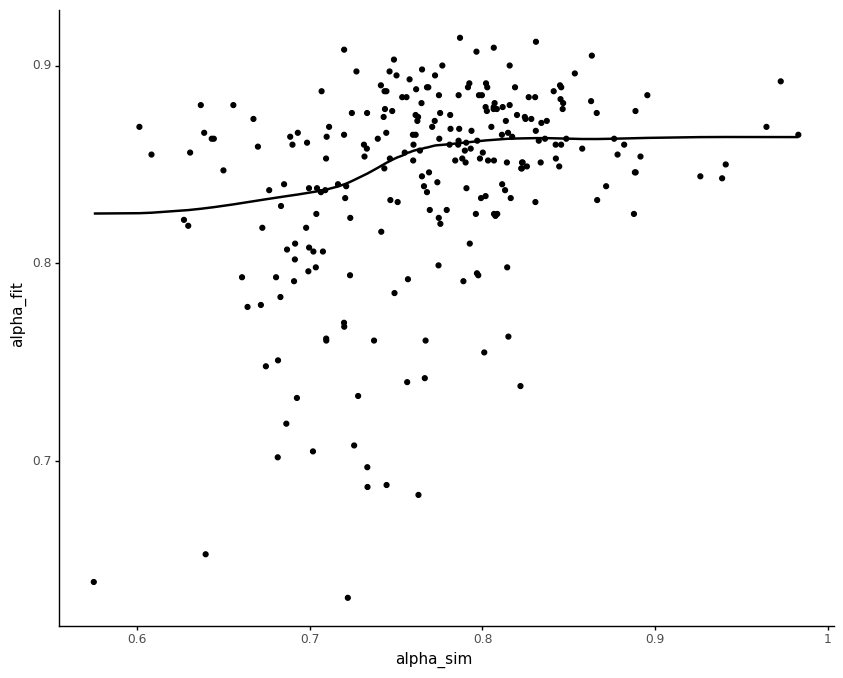

C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


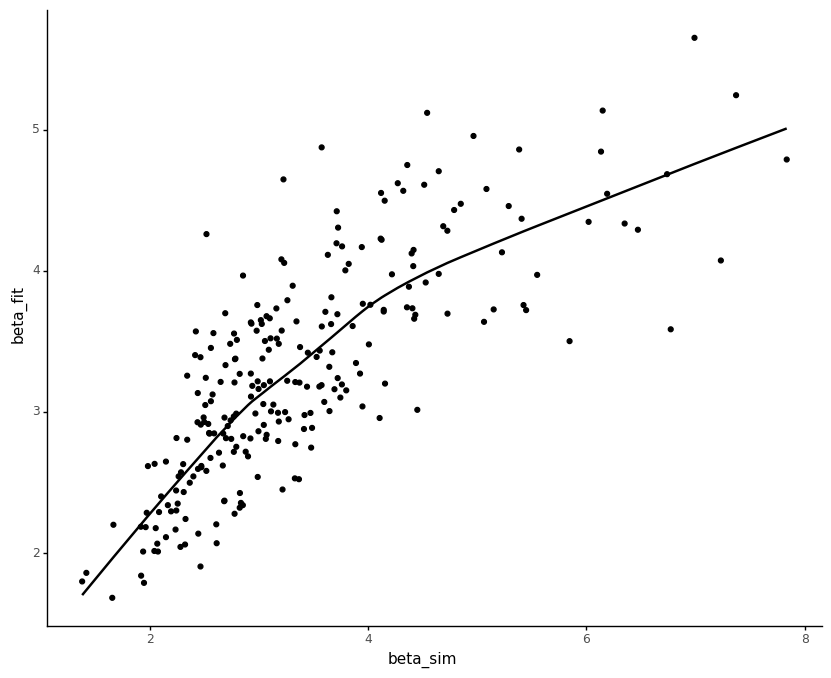

C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


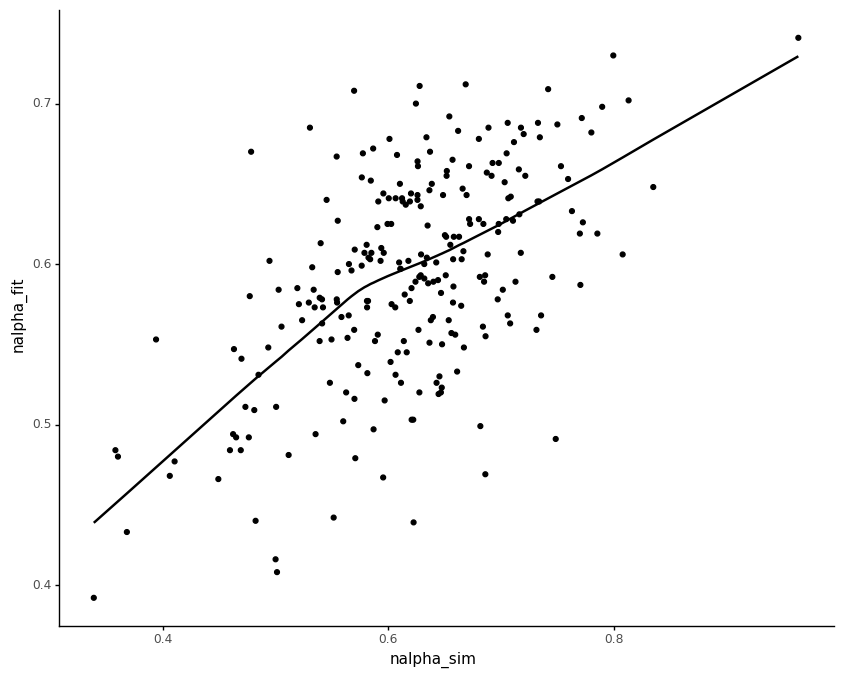

C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


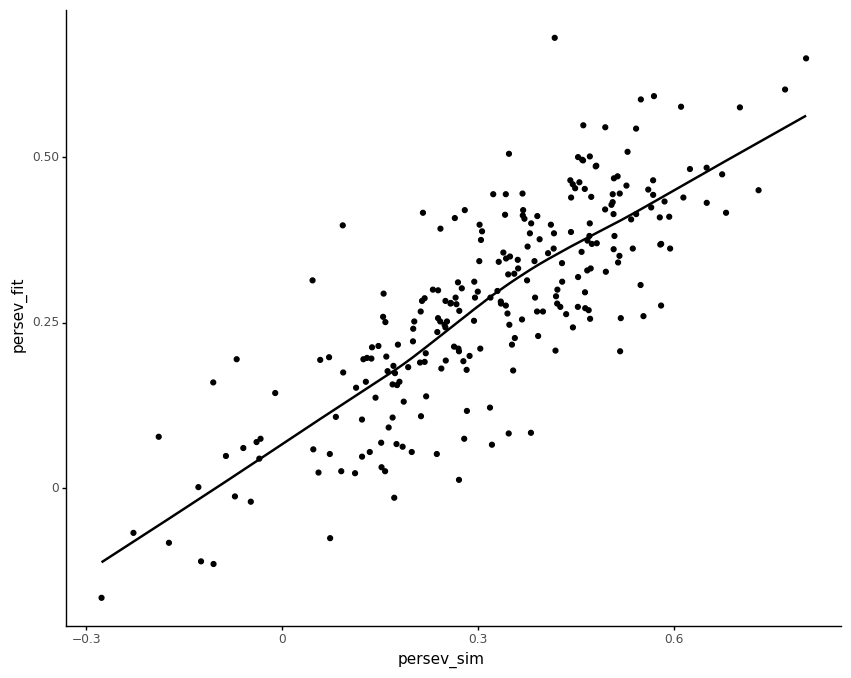

In [39]:
for param in ['alpha', 'beta', 'nalpha', 'persev']:
    
    print(gg.ggplot(gen_rec_dat, gg.aes('{}_sim'.format(param), '{}_fit'.format(param)))
     + gg.geom_point()
     + gg.geom_smooth()
    )

# MetaSLCN-04Plot1FeaturesOverAge

In [40]:
from Functions import get_ages_cols, get_param_names, get_category_dict, get_category_from_feature, zscore

In [41]:
ages_cols = get_ages_cols()
param_names = get_param_names()
category_dict = get_category_dict()

In [42]:
fit_par_dir = "C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/eLifeR2RFittedParams"

In [43]:
ps_params = pd.read_csv(os.path.join(fit_par_dir, "PS.csv"))[['alpha', 'beta', 'nalpha', 'persev', 'sID']]
ps_params['ps_1_over_beta'] = 1 / ps_params['beta']
ps_params = ps_params.rename(columns={'sID': 'ID', 'alpha': 'ps_alpha', 'nalpha': 'ps_nalpha', 'persev': 'ps_persev'})
ps_params = ps_params.drop('beta', axis=1)
ps_params

ps_alpha  ps_nalpha  ps_persev   ID  ps_1_over_beta
0       0.820      0.576      0.468  100        0.334113
1       0.827      0.481      0.255  104        0.380373
2       0.878      0.466      0.462  105        0.212495
3       0.810      0.502      0.243  106        0.290698
4       0.808      0.641      0.193  109        0.483559
..        ...        ...        ...  ...             ...
242     0.697      0.468      0.253   93        0.458295
243     0.806      0.580      0.314   94        0.276014
244     0.875      0.646      0.108   96        0.296033
245     0.816      0.565      0.300   98        0.356125
246     0.900      0.596      0.416   99        0.268384

[247 rows x 5 columns]

In [44]:
bf_params = pd.read_csv(os.path.join(fit_par_dir, "Butterfly.csv"), header=None)
bf_params.columns = ['alpha_sim', 'beta_sim', 'forget_sim', 'bf_alpha', 'bf_beta', 'bf_forget']
bf_params['bf_1_over_beta'] = 1 / bf_params['bf_beta']

# Add sID
assert(np.all(all_sim_params['bf_alpha'] - bf_params['alpha_sim'] < 0.0001))  # verify order is right!!!
bf_params['ID'] = all_sim_params['ID']
bf_params = bf_params[['bf_alpha', 'bf_1_over_beta', 'bf_forget', 'ID']]
bf_params

bf_alpha  bf_1_over_beta  bf_forget   ID
0     0.20500        0.099602   0.074900   17
1     0.21981        0.081070   0.052174   18
2     0.23862        0.081083   0.060955   20
3     0.21411        0.088550   0.049377   22
4     0.24328        0.078321   0.053738   23
..        ...             ...        ...  ...
242   0.19458        0.092859   0.063020  465
243   0.22296        0.089405   0.084234  466
244   0.20763        0.093249   0.059176  467
245   0.23628        0.083056   0.071724  468
246   0.20624        0.089158   0.062625  469

[247 rows x 4 columns]

In [45]:
rl_params = pd.read_csv(os.path.join(fit_par_dir, "RLWM.csv"), header=None).iloc[:, :12]

# Name columns {'WMK','RL \alpha','WM \rho','WM decay','\epsilon','bias'}
cols = ['rl_K', 'rl_log_alpha', 'rl_rho', 'rl_forget', 'rl_epsilon_1_over_beta', 'rl_persev']
rl_params.columns = [col + '_sim' for col in cols] + cols

# Preprocessing (copied from http://localhost:8888/notebooks/MetaSLCN-01ReadInData.ipynb on 2022/04/19)
rl_params['rl_alpha'] = np.exp(rl_params['rl_log_alpha'])
rl_params['rl_log_nalpha'] = np.log((1 - rl_params['rl_persev'] * 0.999) * rl_params['rl_alpha'])
rl_params['rl_pers'] = 0.001 + 0.998 * rl_params['rl_persev']

# Add ID column
assert(np.all(rl_params['rl_log_alpha_sim'] - all_sim_params['rl_log_alpha'] < 0.0001))
rl_params['ID'] = all_sim_params['ID']
rl_params = rl_params[['rl_K', 'rl_log_alpha', 'rl_log_nalpha', 'rl_forget', 'rl_epsilon_1_over_beta', 'ID']]
# rl_params['rl_log_alpha'] = np.exp(rl_params['rl_log_alpha'])
# rl_params['rl_log_nalpha'] = np.exp(rl_params['rl_log_nalpha'])
rl_params.describe()

rl_K  rl_log_alpha  rl_log_nalpha     rl_forget  \
count  247.000000  2.470000e+02   2.470000e+02  2.470000e+02   
mean     3.493927 -3.482899e+00  -5.188288e+00  1.977317e-01   
std      1.054878  1.027944e+00   1.575672e+00  1.636012e-01   
min      2.000000 -6.628900e+00  -1.194676e+01  6.666500e-11   
25%      3.000000 -4.127450e+00  -5.927516e+00  8.794250e-02   
50%      3.000000 -3.578600e+00  -5.041387e+00  1.639700e-01   
75%      4.000000 -3.046900e+00  -4.246290e+00  2.718750e-01   
max      5.000000 -9.972600e-09  -2.249207e-08  1.000000e+00   

       rl_epsilon_1_over_beta          ID  
count            2.470000e+02  247.000000  
mean             2.489986e-02  235.493927  
std              4.884395e-02  139.717248  
min              8.107100e-11   17.000000  
25%              1.953650e-09  120.500000  
50%              6.769100e-03  196.000000  
75%              3.068850e-02  351.500000  
max              3.860800e-01  469.000000

In [46]:
r2r_params = pd.merge(ps_params, bf_params, on=['ID'])
r2r_params = pd.merge(r2r_params, rl_params, on=['ID'])
indiv_info = all_data[ages_cols]
r2r_params = pd.merge(indiv_info, r2r_params, on=['ID'])
r2r_params

ID  PreciseYrs        BMI       meanT   PDS     sex age_group_  \
0     17    8.657084  18.200751         NaN  2.50  Female      08-10   
1     18   12.637919  16.157863         NaN  2.25  Female      10-13   
2     20   14.543463  17.433768  120.649667  2.80    Male      13-15   
3     22   16.490075  22.709959  147.334443  3.00    Male      15-17   
4     23   11.206023  15.147686   27.712900  1.00    Male      10-13   
..   ...         ...        ...         ...   ...     ...        ...   
242  465   22.333333        NaN         NaN   NaN  Female     2Stud.   
243  466   20.083333        NaN         NaN   NaN    Male     2Stud.   
244  467   18.750000        NaN         NaN   NaN  Female     2Stud.   
245  468   21.833333        NaN         NaN   NaN  Female     2Stud.   
246  469   19.000000        NaN         NaN   NaN  Female     2Stud.   

    PDS_group_ T_group_  ps_alpha  ...  ps_persev  ps_1_over_beta  bf_alpha  \
0        2_mid      NaN     0.708  ...      0.024        0.382409   0.20500   
1      1_early      NaN     0.825  ...      0.445        0.327761   0.21981   
2       3_late   3_100%     0.860  ...      0.496        0.224266   0.23862   
3       3_late   3_100%     0.740  ...      0.412        0.355366   0.21411   
4        0_pre    1_50%     0.825  ...      0.161        0.393391   0.24328   
..         ...      ...       ...  ...        ...             ...       ...   
242    4_Stud.  4_Stud.     0.841  ...      0.508        0.279720   0.19458   
243    4_Stud.  4_Stud.     0.869  ...      0.052        0.238379   0.22296   
244    4_Stud.  4_Stud.     0.903  ...      0.204        0.275862   0.20763   
245    4_Stud.  4_Stud.     0.844  ...      0.276        0.374111   0.23628   
246    4_Stud.  4_Stud.     0.863  ...      0.424        0.351370   0.20624   

     bf_1_over_beta  bf_forget  rl_K  rl_log_alpha  rl_log_nalpha  rl_forget  \
0          0.099602   0.074900     3 -4.656700e+00  -5.384464e+00   0.366520   
1          0.081070   0.052174     4 -4.360000e+00  -5.978113e+00   0.104170   
2          0.081083   0.060955     5 -3.359800e+00  -5.925647e+00   0.082132   
3          0.088550   0.049377     3 -4.285700e+00  -6.866212e+00   0.120620   
4          0.078321   0.053738     5 -3.644500e+00  -4.165449e+00   0.012333   
..              ...        ...   ...           ...            ...        ...   
242        0.092859   0.063020     3 -3.874600e+00  -5.126137e+00   0.197000   
243        0.089405   0.084234     5 -1.594400e-06  -3.288933e+00   0.406360   
244        0.093249   0.059176     3 -3.541300e+00  -3.911423e+00   0.239550   
245        0.083056   0.071724     4 -9.972600e-09  -2.249207e-08   0.365440   
246        0.089158   0.062625     3 -3.002400e+00  -8.174028e+00   0.239520   

     rl_epsilon_1_over_beta  
0              2.199700e-09  
1              2.250800e-09  
2              7.499800e-10  
3              1.126000e-07  
4              2.349600e-02  
..                      ...  
242            1.770400e-02  
243            8.438500e-03  
244            4.165400e-02  
245            7.097300e-02  
246            8.539400e-02  

[247 rows x 21 columns]

In [47]:
r2r_params_z = r2r_params[ages_cols]
for col in [col for col in r2r_params.columns if not col in ages_cols]:
    r2r_params_z[col] = zscore(r2r_params[col])
r2r_params_z

C:\Users\maria\AppData\Local\Temp\ipykernel_22280\1678113497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\1678113497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\maria\AppData\Local\Temp\ipykernel_22280\1678113497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

ID  PreciseYrs        BMI       meanT   PDS     sex age_group_  \
0     17    8.657084  18.200751         NaN  2.50  Female      08-10   
1     18   12.637919  16.157863         NaN  2.25  Female      10-13   
2     20   14.543463  17.433768  120.649667  2.80    Male      13-15   
3     22   16.490075  22.709959  147.334443  3.00    Male      15-17   
4     23   11.206023  15.147686   27.712900  1.00    Male      10-13   
..   ...         ...        ...         ...   ...     ...        ...   
242  465   22.333333        NaN         NaN   NaN  Female     2Stud.   
243  466   20.083333        NaN         NaN   NaN    Male     2Stud.   
244  467   18.750000        NaN         NaN   NaN  Female     2Stud.   
245  468   21.833333        NaN         NaN   NaN  Female     2Stud.   
246  469   19.000000        NaN         NaN   NaN  Female     2Stud.   

    PDS_group_ T_group_  ps_alpha  ...  ps_persev  ps_1_over_beta  bf_alpha  \
0        2_mid      NaN -2.617649  ...  -1.667720        0.748232 -0.310675   
1      1_early      NaN -0.333539  ...   1.051333        0.068209  0.192734   
2       3_late   3_100%  0.349742  ...   1.380720       -1.219665  0.832107   
3       3_late   3_100% -1.992935  ...   0.838201        0.411714 -0.001016   
4        0_pre    1_50% -0.333539  ...  -0.782898        0.884887  0.990505   
..         ...      ...       ...  ...        ...             ...       ...   
242    4_Stud.  4_Stud. -0.021182  ...   1.458222       -0.529601 -0.664862   
243    4_Stud.  4_Stud.  0.525442  ...  -1.486881       -1.044041  0.299806   
244    4_Stud.  4_Stud.  1.189201  ...  -0.505180       -0.577612 -0.221278   
245    4_Stud.  4_Stud.  0.037385  ...  -0.040163        0.644977  0.752567   
246    4_Stud.  4_Stud.  0.408309  ...   0.915703        0.361993 -0.268526   

     bf_1_over_beta  bf_forget      rl_K  rl_log_alpha  rl_log_nalpha  \
0          0.994890   1.860612 -0.468231     -1.141891      -0.124503   
1         -0.709557  -0.882624  0.479745     -0.853257      -0.501262   
2         -0.708348   0.177323  1.427722      0.119753      -0.467965   
3         -0.021550  -1.220247 -0.468231     -0.780977      -1.064894   
4         -0.962428  -0.693835  1.427722     -0.157208       0.649145   
..              ...        ...       ...           ...            ...   
242        0.374747   0.426588 -0.468231     -0.381052       0.039444   
243        0.057092   2.987311  1.427722      3.388216       1.205425   
244        0.410586  -0.037418 -0.468231     -0.056813       0.810363   
245       -0.526860   1.477240  0.479745      3.388218       3.292747   
246        0.034364   0.378907 -0.468231      0.467437      -1.894900   

     rl_forget  rl_epsilon_1_over_beta  
0     1.031706               -0.509784  
1    -0.571889               -0.509784  
2    -0.706594               -0.509784  
3    -0.471339               -0.509782  
4    -1.133235               -0.028742  
..         ...                     ...  
242  -0.004472               -0.147323  
243   1.275225               -0.337019  
244   0.255611                0.343014  
245   1.025104                0.943272  
246   0.255428                1.238519  

[247 rows x 21 columns]

In [48]:
r2r_params_long = pd.melt(r2r_params, id_vars=ages_cols, var_name='feature')
r2r_params_long['task'] = r2r_params_long['feature'].apply(lambda x: x[:2])
r2r_params_long['param'] = r2r_params_long['feature'].apply(lambda x: x[3:])
r2r_params_long['category'] = get_category_from_feature(r2r_params_long['feature'], category_dict)
r2r_params_long

ID  PreciseYrs        BMI       meanT   PDS     sex age_group_  \
0      17    8.657084  18.200751         NaN  2.50  Female      08-10   
1      18   12.637919  16.157863         NaN  2.25  Female      10-13   
2      20   14.543463  17.433768  120.649667  2.80    Male      13-15   
3      22   16.490075  22.709959  147.334443  3.00    Male      15-17   
4      23   11.206023  15.147686   27.712900  1.00    Male      10-13   
...   ...         ...        ...         ...   ...     ...        ...   
2959  465   22.333333        NaN         NaN   NaN  Female     2Stud.   
2960  466   20.083333        NaN         NaN   NaN    Male     2Stud.   
2961  467   18.750000        NaN         NaN   NaN  Female     2Stud.   
2962  468   21.833333        NaN         NaN   NaN  Female     2Stud.   
2963  469   19.000000        NaN         NaN   NaN  Female     2Stud.   

     PDS_group_ T_group_                 feature     value task  \
0         2_mid      NaN                ps_alpha  0.708000   ps   
1       1_early      NaN                ps_alpha  0.825000   ps   
2        3_late   3_100%                ps_alpha  0.860000   ps   
3        3_late   3_100%                ps_alpha  0.740000   ps   
4         0_pre    1_50%                ps_alpha  0.825000   ps   
...         ...      ...                     ...       ...  ...   
2959    4_Stud.  4_Stud.  rl_epsilon_1_over_beta  0.017704   rl   
2960    4_Stud.  4_Stud.  rl_epsilon_1_over_beta  0.008438   rl   
2961    4_Stud.  4_Stud.  rl_epsilon_1_over_beta  0.041654   rl   
2962    4_Stud.  4_Stud.  rl_epsilon_1_over_beta  0.070973   rl   
2963    4_Stud.  4_Stud.  rl_epsilon_1_over_beta  0.085394   rl   

                    param category  
0                   alpha    Alpha  
1                   alpha    Alpha  
2                   alpha    Alpha  
3                   alpha    Alpha  
4                   alpha    Alpha  
...                   ...      ...  
2959  epsilon_1_over_beta     Beta  
2960  epsilon_1_over_beta     Beta  
2961  epsilon_1_over_beta     Beta  
2962  epsilon_1_over_beta     Beta  
2963  epsilon_1_over_beta     Beta  

[2964 rows x 14 columns]

In [49]:
# This is to get the alpha's on the same scale for plotting absolute values
r2r_params_long.loc[r2r_params_long['feature'] == 'rl_log_alpha', 'value'] = np.exp(
    r2r_params_long.loc[r2r_params_long['feature'] == 'rl_log_alpha', 'value'])
r2r_params_long.loc[r2r_params_long['feature'] == 'rl_log_nalpha', 'value'] = np.exp(
    r2r_params_long.loc[r2r_params_long['feature'] == 'rl_log_nalpha', 'value'])
r2r_params_long

ID  PreciseYrs        BMI       meanT   PDS     sex age_group_  \
0      17    8.657084  18.200751         NaN  2.50  Female      08-10   
1      18   12.637919  16.157863         NaN  2.25  Female      10-13   
2      20   14.543463  17.433768  120.649667  2.80    Male      13-15   
3      22   16.490075  22.709959  147.334443  3.00    Male      15-17   
4      23   11.206023  15.147686   27.712900  1.00    Male      10-13   
...   ...         ...        ...         ...   ...     ...        ...   
2959  465   22.333333        NaN         NaN   NaN  Female     2Stud.   
2960  466   20.083333        NaN         NaN   NaN    Male     2Stud.   
2961  467   18.750000        NaN         NaN   NaN  Female     2Stud.   
2962  468   21.833333        NaN         NaN   NaN  Female     2Stud.   
2963  469   19.000000        NaN         NaN   NaN  Female     2Stud.   

     PDS_group_ T_group_                 feature     value task  \
0         2_mid      NaN                ps_alpha  0.708000   ps   
1       1_early      NaN                ps_alpha  0.825000   ps   
2        3_late   3_100%                ps_alpha  0.860000   ps   
3        3_late   3_100%                ps_alpha  0.740000   ps   
4         0_pre    1_50%                ps_alpha  0.825000   ps   
...         ...      ...                     ...       ...  ...   
2959    4_Stud.  4_Stud.  rl_epsilon_1_over_beta  0.017704   rl   
2960    4_Stud.  4_Stud.  rl_epsilon_1_over_beta  0.008438   rl   
2961    4_Stud.  4_Stud.  rl_epsilon_1_over_beta  0.041654   rl   
2962    4_Stud.  4_Stud.  rl_epsilon_1_over_beta  0.070973   rl   
2963    4_Stud.  4_Stud.  rl_epsilon_1_over_beta  0.085394   rl   

                    param category  
0                   alpha    Alpha  
1                   alpha    Alpha  
2                   alpha    Alpha  
3                   alpha    Alpha  
4                   alpha    Alpha  
...                   ...      ...  
2959  epsilon_1_over_beta     Beta  
2960  epsilon_1_over_beta     Beta  
2961  epsilon_1_over_beta     Beta  
2962  epsilon_1_over_beta     Beta  
2963  epsilon_1_over_beta     Beta  

[2964 rows x 14 columns]

In [50]:
r2r_params_long_z = pd.melt(r2r_params_z, id_vars=ages_cols, var_name='feature')
r2r_params_long_z['task'] = r2r_params_long_z['feature'].apply(lambda x: x[:2])
r2r_params_long_z['param'] = r2r_params_long_z['feature'].apply(lambda x: x[3:])
r2r_params_long_z['category'] = get_category_from_feature(r2r_params_long_z['feature'], category_dict)
r2r_params_long_z

ID  PreciseYrs        BMI       meanT   PDS     sex age_group_  \
0      17    8.657084  18.200751         NaN  2.50  Female      08-10   
1      18   12.637919  16.157863         NaN  2.25  Female      10-13   
2      20   14.543463  17.433768  120.649667  2.80    Male      13-15   
3      22   16.490075  22.709959  147.334443  3.00    Male      15-17   
4      23   11.206023  15.147686   27.712900  1.00    Male      10-13   
...   ...         ...        ...         ...   ...     ...        ...   
2959  465   22.333333        NaN         NaN   NaN  Female     2Stud.   
2960  466   20.083333        NaN         NaN   NaN    Male     2Stud.   
2961  467   18.750000        NaN         NaN   NaN  Female     2Stud.   
2962  468   21.833333        NaN         NaN   NaN  Female     2Stud.   
2963  469   19.000000        NaN         NaN   NaN  Female     2Stud.   

     PDS_group_ T_group_                 feature     value task  \
0         2_mid      NaN                ps_alpha -2.617649   ps   
1       1_early      NaN                ps_alpha -0.333539   ps   
2        3_late   3_100%                ps_alpha  0.349742   ps   
3        3_late   3_100%                ps_alpha -1.992935   ps   
4         0_pre    1_50%                ps_alpha -0.333539   ps   
...         ...      ...                     ...       ...  ...   
2959    4_Stud.  4_Stud.  rl_epsilon_1_over_beta -0.147323   rl   
2960    4_Stud.  4_Stud.  rl_epsilon_1_over_beta -0.337019   rl   
2961    4_Stud.  4_Stud.  rl_epsilon_1_over_beta  0.343014   rl   
2962    4_Stud.  4_Stud.  rl_epsilon_1_over_beta  0.943272   rl   
2963    4_Stud.  4_Stud.  rl_epsilon_1_over_beta  1.238519   rl   

                    param category  
0                   alpha    Alpha  
1                   alpha    Alpha  
2                   alpha    Alpha  
3                   alpha    Alpha  
4                   alpha    Alpha  
...                   ...      ...  
2959  epsilon_1_over_beta     Beta  
2960  epsilon_1_over_beta     Beta  
2961  epsilon_1_over_beta     Beta  
2962  epsilon_1_over_beta     Beta  
2963  epsilon_1_over_beta     Beta  

[2964 rows x 14 columns]

In [51]:
# Save data
r2r_params.to_csv(os.path.join(data_save_path, "r2r_params.csv"))
r2r_params_long.to_csv(os.path.join(data_save_path, "r2r_params_long.csv"))
r2r_params_z.to_csv(os.path.join(data_save_path, "r2r_params_z.csv"))
r2r_params_long_z.to_csv(os.path.join(data_save_path, "r2r_params_long_z.csv"))

C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


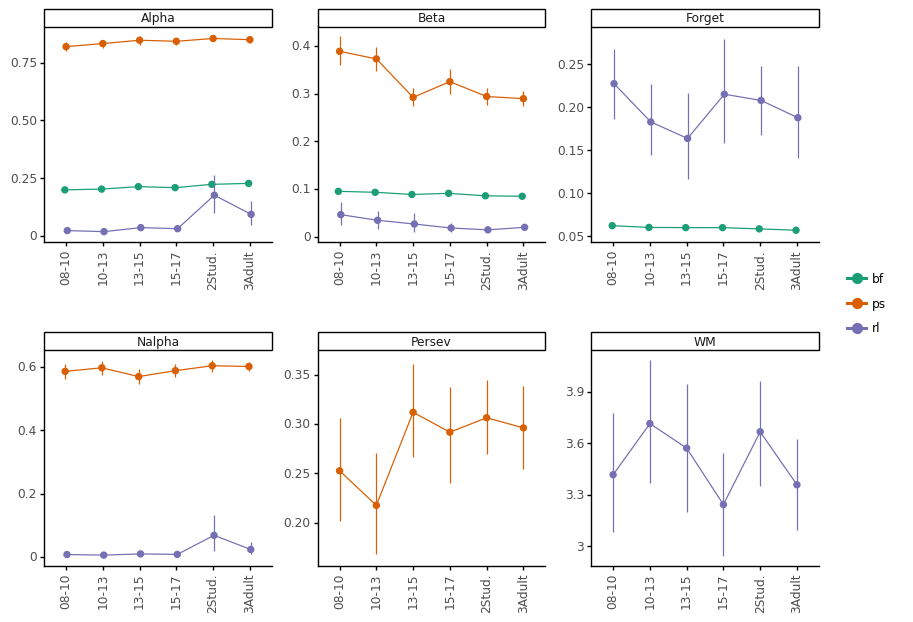

C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 10 x 7 in image.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\15_SimParamsOverAge.png
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 10 x 7 in image.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\15_S

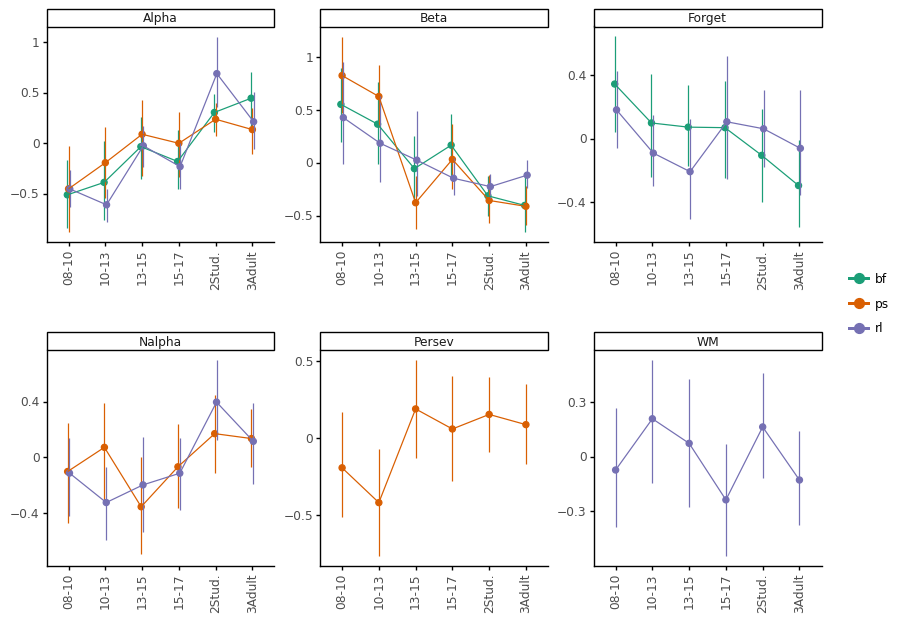

C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 10 x 7 in image.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\15_SimParamsOverAge_z.png
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 10 x 7 in image.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\15

In [72]:
gg.options.figure_size = (10, 7)

g_r2r = (gg.ggplot(r2r_params_long, gg.aes('age_group_', 'value', group='feature', color='task', fill='task'))
+ gg.stat_summary(position=gg.position_dodge(width=0.1))  # fun_data='median_hilow', 
+ gg.stat_summary(geom='line', position=gg.position_dodge(width=0.1))  # fun_data='median_hilow', 
+ gg.labs(x='', y='', color='', fill='')
+ gg.scales.scale_color_brewer(type='qual', palette=2)
+ gg.scales.scale_fill_brewer(type='qual', palette=2)
+ gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
+ gg.theme(subplots_adjust={'hspace': 0.5, 'wspace': 0.2})
+ gg.facet_wrap('~ category', scales='free')
)
print(g_r2r)
g_r2r.save(os.path.join(plot_save_path, '15_SimParamsOverAge.png'))
g_r2r.save(os.path.join(plot_save_path, '15_SimParamsOverAge.svg'))

g_r2r_z = g_r2r
g_r2r_z.data = r2r_params_long_z

print(g_r2r_z)
g_r2r_z.save(os.path.join(plot_save_path, '15_SimParamsOverAge_z.png'))
g_r2r_z.save(os.path.join(plot_save_path, '15_SimParamsOverAge_z.svg'))

In [57]:
from statsmodels.stats.anova import AnovaRM
import itertools
from scipy.stats import spearmanr, ttest_1samp, f
import statsmodels.formula.api as smf

In [54]:
for category in ['Alpha', 'Beta', 'Forget', 'Nalpha']:
    
    sub_dat = r2r_params_long.loc[r2r_params_long['category'] == category]

    task_anova = AnovaRM(sub_dat, 'value', 'ID', ['task']).fit().summary()
    print(task_anova)
        
    for combo in itertools.combinations(np.unique(sub_dat['feature']), 2):

        print(combo)
        
        rel_dat = pd.merge(
            sub_dat.loc[sub_dat['feature'] == combo[0], ['ID', 'value']],
            sub_dat.loc[sub_dat['feature'] == combo[1], ['ID', 'value']],
            on='ID', suffixes=['0', '1']
        )
        rel_dat['param_diff'] = rel_dat['value0'] - rel_dat['value1']
        
        print('df: {}, t-test: {}'.format(
            rel_dat.shape[0]-1, ttest_1samp(rel_dat['param_diff'], popmean=0))
             )

                Anova
      F Value  Num DF  Den DF  Pr > F
-------------------------------------
task 3753.3471 2.0000 492.0000 0.0000

('bf_alpha', 'ps_alpha')
df: 246, t-test: Ttest_1sampResult(statistic=-188.52115114067075, pvalue=4.847096598862035e-268)
('bf_alpha', 'rl_log_alpha')
df: 246, t-test: Ttest_1sampResult(statistic=12.735451471972103, pvalue=7.121214180282876e-29)
('ps_alpha', 'rl_log_alpha')
df: 246, t-test: Ttest_1sampResult(statistic=66.74646797545712, pvalue=1.3249177985456813e-159)
                Anova
      F Value  Num DF  Den DF  Pr > F
-------------------------------------
task 2628.9142 2.0000 492.0000 0.0000

('bf_1_over_beta', 'ps_1_over_beta')
df: 246, t-test: Ttest_1sampResult(statistic=-48.708286371504315, pvalue=2.465368984159936e-128)
('bf_1_over_beta', 'rl_epsilon_1_over_beta')
df: 246, t-test: Ttest_1sampResult(statistic=21.918763865246046, pvalue=8.973096507323676e-60)
('ps_1_over_beta', 'rl_epsilon_1_over_beta')
df: 246, t-test: Ttest_1sampResult(s

In [58]:
for category in ['Alpha', 'Beta', 'Forget', 'Nalpha']:
    
    sub_dat = r2r_params_long_z.loc[r2r_params_long_z['category'] == category]
    n_subj = len(np.unique(sub_dat['ID']))
    print(np.unique(sub_dat['feature']))
    
    task_mod = smf.mixedlm(
        formula='value ~ (PreciseYrs + np.square(PreciseYrs)) * task', groups=sub_dat['ID'], data=sub_dat
    ).fit(reml=False)
    
    no_task_mod = smf.mixedlm(
        formula='value ~ (PreciseYrs + np.square(PreciseYrs))', groups=sub_dat['ID'], data=sub_dat
    ).fit(reml=False)
    
    print(category)
    if no_task_mod.aic > task_mod.aic:
        
        # Calculate F-stats
        ## Residual sums of squares
        RSS_task = np.sum(task_mod.resid * task_mod.resid)
        RSS_no_task = np.sum(no_task_mod.resid * no_task_mod.resid)
        RSS_diff = RSS_no_task - RSS_task

        df_task = n_subj - len(['PreciseYrs', 'PreciseYrs_squared']) * len(np.unique(sub_dat['task']))
        df_no_task = n_subj - len(['PreciseYrs', 'PreciseYrs_squared'])
        print(len(['PreciseYrs', 'PreciseYrs_squared']) * len(np.unique(sub_dat['task'])), len(['PreciseYrs', 'PreciseYrs_squared']))
        df_diff = df_no_task - df_task

        MS_task = RSS_task / df_task
        MS_diff = RSS_diff / df_diff

        F = MS_diff / MS_task

        p = 1 - f.cdf(F, df_diff, df_no_task)

        # APA reporting F-test: "R2 = .12, F(1, 225) = 42.64, p < .001"
        print('Including task makes the AIC better (no task AIC: {}; task AIC: {}; F({},{})={}, p: {})'.format(
            no_task_mod.aic.round(2), task_mod.aic.round(2), df_diff, df_no_task, F.round(2), p.round(5)))
        
    else:
        print('Including task does NOT make the AIC better (no task AIC: {}; task AIC: {})'.format(
            no_task_mod.aic.round(2), task_mod.aic.round(2)))
    
    print(no_task_mod.summary())

['bf_alpha' 'ps_alpha' 'rl_log_alpha']
Alpha
Including task does NOT make the AIC better (no task AIC: 1991.65; task AIC: 1995.52)
             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    value    
No. Observations:    741        Method:                ML       
No. Groups:          247        Scale:                 0.6846   
Min. group size:     3          Log-Likelihood:        -990.8235
Max. group size:     3          Converged:             Yes      
Mean group size:     3.0                                        
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             -2.277    0.426 -5.349 0.000 -3.111 -1.443
PreciseYrs             0.216    0.048  4.486 0.000  0.122  0.311
np.square(PreciseYrs) -0.004    0.001 -3.522 0.000 -0.007 -0.002
Group Var              0.207    0.058 

# Pairwise correlations

In [59]:
import scipy

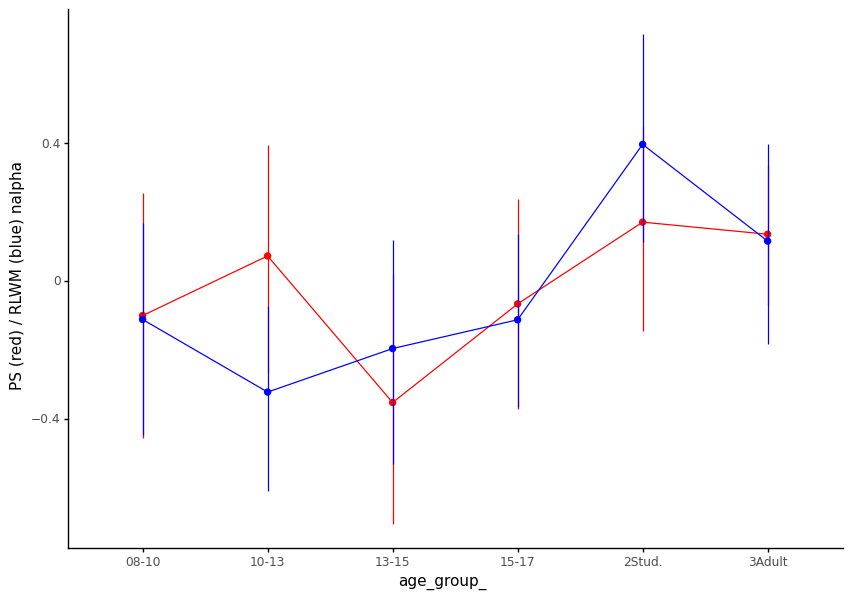

<ggplot: (163142341380)>

In [60]:
(gg.ggplot(r2r_params_z, gg.aes(x='age_group_', group=1))
 + gg.stat_summary(gg.aes(y='ps_nalpha'), color='red')
 + gg.stat_summary(gg.aes(y='rl_log_nalpha'), color='blue')
 + gg.stat_summary(gg.aes(y='ps_nalpha'), color='red', geom='line')
 + gg.stat_summary(gg.aes(y='rl_log_nalpha'), color='blue', geom='line')
 + gg.labs(y='PS (red) / RLWM (blue) nalpha')
)

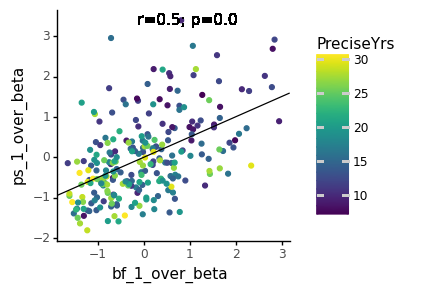

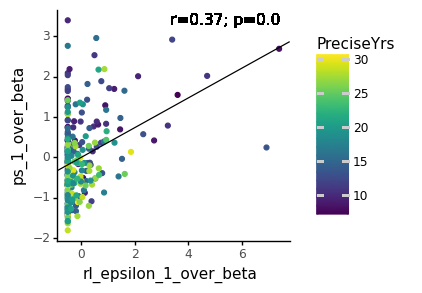

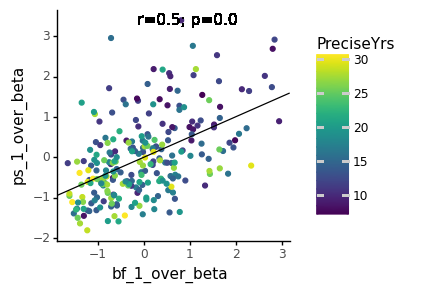

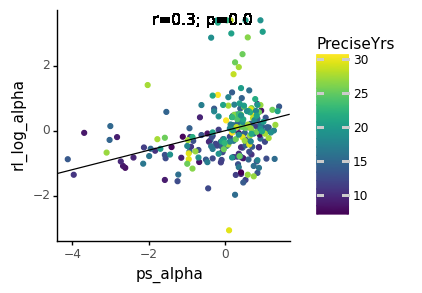

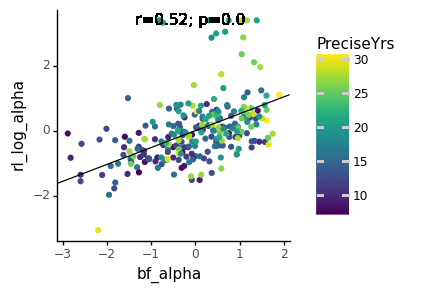

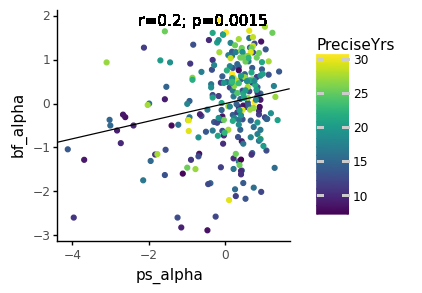

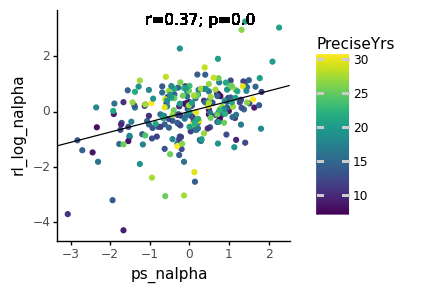

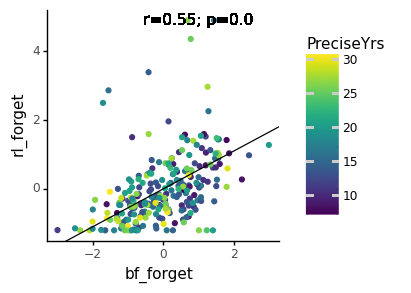

In [61]:
dat = r2r_params_z
gg.options.figure_size = (3, 3)

for x_col, y_col in (
    ('bf_1_over_beta', 'ps_1_over_beta'), ('rl_epsilon_1_over_beta', 'ps_1_over_beta'), ('bf_1_over_beta', 'ps_1_over_beta'), 
    ('ps_alpha', 'rl_log_alpha'), ('bf_alpha', 'rl_log_alpha'), ('ps_alpha', 'bf_alpha'), 
    ('ps_nalpha', 'rl_log_nalpha'),
    ('bf_forget', 'rl_forget'),
    ):

    r, p = scipy.stats.spearmanr(dat[x_col], dat[y_col])
    text = ('r={}; p={}'.format(np.round(r, 2), np.round(p, 4)))
    
    g = (gg.ggplot(dat, gg.aes(x_col, y_col, color='PreciseYrs'))
         + gg.geom_point()
         + gg.geom_text(x=max(dat[x_col]) - 2, y=max(dat[y_col]), color='black', label=text)
    #      + gg.geom_smooth(method='lm')  # issue here: uses pearson, not spearman
         + gg.geom_abline(
             intercept=np.mean(dat[y_col]),
             slope=scipy.stats.spearmanr(dat[x_col], dat[y_col]).correlation)
    )
    
#     g.save(os.path.join(plot_save_path, '2_corr_{}_{}.svg'.format(x_col, y_col)))
#     g.save(os.path.join(plot_save_path, '2_corr_{}_{}.png'.format(x_col, y_col)))
    print(g)

# Table 4: Statistics of the regression models predicting each parameter from the corresponding parameter in a different task, while controlling for age

In [62]:
r2r_params

ID  PreciseYrs        BMI       meanT   PDS     sex age_group_  \
0     17    8.657084  18.200751         NaN  2.50  Female      08-10   
1     18   12.637919  16.157863         NaN  2.25  Female      10-13   
2     20   14.543463  17.433768  120.649667  2.80    Male      13-15   
3     22   16.490075  22.709959  147.334443  3.00    Male      15-17   
4     23   11.206023  15.147686   27.712900  1.00    Male      10-13   
..   ...         ...        ...         ...   ...     ...        ...   
242  465   22.333333        NaN         NaN   NaN  Female     2Stud.   
243  466   20.083333        NaN         NaN   NaN    Male     2Stud.   
244  467   18.750000        NaN         NaN   NaN  Female     2Stud.   
245  468   21.833333        NaN         NaN   NaN  Female     2Stud.   
246  469   19.000000        NaN         NaN   NaN  Female     2Stud.   

    PDS_group_ T_group_  ps_alpha  ...  ps_persev  ps_1_over_beta  bf_alpha  \
0        2_mid      NaN     0.708  ...      0.024        0.382409   0.20500   
1      1_early      NaN     0.825  ...      0.445        0.327761   0.21981   
2       3_late   3_100%     0.860  ...      0.496        0.224266   0.23862   
3       3_late   3_100%     0.740  ...      0.412        0.355366   0.21411   
4        0_pre    1_50%     0.825  ...      0.161        0.393391   0.24328   
..         ...      ...       ...  ...        ...             ...       ...   
242    4_Stud.  4_Stud.     0.841  ...      0.508        0.279720   0.19458   
243    4_Stud.  4_Stud.     0.869  ...      0.052        0.238379   0.22296   
244    4_Stud.  4_Stud.     0.903  ...      0.204        0.275862   0.20763   
245    4_Stud.  4_Stud.     0.844  ...      0.276        0.374111   0.23628   
246    4_Stud.  4_Stud.     0.863  ...      0.424        0.351370   0.20624   

     bf_1_over_beta  bf_forget  rl_K  rl_log_alpha  rl_log_nalpha  rl_forget  \
0          0.099602   0.074900     3 -4.656700e+00  -5.384464e+00   0.366520   
1          0.081070   0.052174     4 -4.360000e+00  -5.978113e+00   0.104170   
2          0.081083   0.060955     5 -3.359800e+00  -5.925647e+00   0.082132   
3          0.088550   0.049377     3 -4.285700e+00  -6.866212e+00   0.120620   
4          0.078321   0.053738     5 -3.644500e+00  -4.165449e+00   0.012333   
..              ...        ...   ...           ...            ...        ...   
242        0.092859   0.063020     3 -3.874600e+00  -5.126137e+00   0.197000   
243        0.089405   0.084234     5 -1.594400e-06  -3.288933e+00   0.406360   
244        0.093249   0.059176     3 -3.541300e+00  -3.911423e+00   0.239550   
245        0.083056   0.071724     4 -9.972600e-09  -2.249207e-08   0.365440   
246        0.089158   0.062625     3 -3.002400e+00  -8.174028e+00   0.239520   

     rl_epsilon_1_over_beta  
0              2.199700e-09  
1              2.250800e-09  
2              7.499800e-10  
3              1.126000e-07  
4              2.349600e-02  
..                      ...  
242            1.770400e-02  
243            8.438500e-03  
244            4.165400e-02  
245            7.097300e-02  
246            8.539400e-02  

[247 rows x 21 columns]

In [63]:
print('beta')
task_mod = smf.mixedlm(
    formula='ps_1_over_beta ~ (PreciseYrs + np.square(PreciseYrs) + bf_1_over_beta)', groups=r2r_params['ID'], data=r2r_params
).fit(reml=False)
print(task_mod.summary())

# task_mod = smf.mixedlm(
#     formula='ps_1_over_beta ~ (PreciseYrs + np.square(PreciseYrs) + rl_log_alpha)', groups=r2r_params['ID'], data=r2r_params
# ).fit(reml=False)
# print(task_mod.summary())

task_mod = smf.mixedlm(
    formula='ps_1_over_beta ~ (PreciseYrs + np.square(PreciseYrs) + rl_epsilon_1_over_beta)', groups=r2r_params['ID'], data=r2r_params
).fit(reml=False)
print(task_mod.summary())

task_mod = smf.mixedlm(
    formula='bf_1_over_beta ~ (PreciseYrs + np.square(PreciseYrs) + rl_epsilon_1_over_beta)', groups=r2r_params['ID'], data=r2r_params
).fit(reml=False)
print(task_mod.summary())

beta


C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


              Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  ps_1_over_beta
No. Observations:    247      Method:              ML            
No. Groups:          247      Scale:               0.0021        
Min. group size:     1        Log-Likelihood:      324.4194      
Max. group size:     1        Converged:           Yes           
Mean group size:     1.0                                         
-----------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.232    0.035   6.537 0.000  0.162  0.301
PreciseYrs            -0.018    0.000 -55.008 0.000 -0.018 -0.017
np.square(PreciseYrs)  0.000    0.000  15.073 0.000  0.000  0.000
bf_1_over_beta         3.044    0.397   7.660 0.000  2.265  3.823
Group Var              0.002                                     



C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


              Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   ps_1_over_beta
No. Observations:   247       Method:               ML            
No. Groups:         247       Scale:                0.0024        
Min. group size:    1         Log-Likelihood:       310.0024      
Max. group size:    1         Converged:            Yes           
Mean group size:    1.0                                           
------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept               0.510    0.015  34.379 0.000  0.481  0.539
PreciseYrs             -0.018    0.001 -23.066 0.000 -0.020 -0.017
np.square(PreciseYrs)   0.000    0.000  50.617 0.000  0.000  0.000
rl_epsilon_1_over_beta  0.439    0.091   4.848 0.000  0.262  0.617
Group Var               0.002                                     

         

C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


In [64]:
print('Alpha')
task_mod = smf.mixedlm(
    formula='ps_alpha ~ (PreciseYrs + np.square(PreciseYrs) + bf_alpha)', groups=r2r_params['ID'], data=r2r_params
).fit(reml=False)
print(task_mod.summary())

task_mod = smf.mixedlm(
    formula='ps_alpha ~ (PreciseYrs + np.square(PreciseYrs) + rl_log_alpha)', groups=r2r_params['ID'], data=r2r_params
).fit(reml=False)
print(task_mod.summary())

task_mod = smf.mixedlm(
    formula='bf_alpha ~ (PreciseYrs + np.square(PreciseYrs) + rl_log_alpha)', groups=r2r_params['ID'], data=r2r_params
).fit(reml=False)
print(task_mod.summary())


Alpha


C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    ps_alpha
No. Observations:      247        Method:                ML      
No. Groups:            247        Scale:                 0.0012  
Min. group size:       1          Log-Likelihood:        396.6830
Max. group size:       1          Converged:             Yes     
Mean group size:       1.0                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.674    0.027  24.656 0.000  0.620  0.727
PreciseYrs             0.010    0.001  16.785 0.000  0.009  0.011
np.square(PreciseYrs) -0.000    0.000 -10.601 0.000 -0.000 -0.000
bf_alpha               0.338    0.107   3.148 0.002  0.128  0.549
Group Var              0.001                                     



C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    ps_alpha
No. Observations:      247        Method:                ML      
No. Groups:            247        Scale:                 0.0012  
Min. group size:       1          Log-Likelihood:        395.5089
Max. group size:       1          Converged:             Yes     
Mean group size:       1.0                                       
-----------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              0.781    0.016  48.149 0.000  0.749  0.813
PreciseYrs             0.009    0.000  33.119 0.000  0.009  0.010
np.square(PreciseYrs) -0.000    0.000 -21.437 0.000 -0.000 -0.000
rl_log_alpha           0.008    0.003   2.603 0.009  0.002  0.015
Group Var              0.001                                     

             Mixed Line

C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


In [65]:
print('Nalpha')
task_mod = smf.mixedlm(
    formula='ps_nalpha ~ (PreciseYrs + np.square(PreciseYrs) + rl_log_nalpha)', groups=r2r_params['ID'], data=r2r_params
).fit(reml=False)
print(task_mod.summary())

print('Forget')
task_mod = smf.mixedlm(
    formula='bf_forget ~ (PreciseYrs + np.square(PreciseYrs) + rl_forget)', groups=r2r_params['ID'], data=r2r_params
).fit(reml=False)
print(task_mod.summary())

Nalpha


C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    ps_nalpha
No. Observations:    247        Method:                ML       
No. Groups:          247        Scale:                 0.0017   
Min. group size:     1          Log-Likelihood:        349.1288 
Max. group size:     1          Converged:             Yes      
Mean group size:     1.0                                        
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              0.685    0.034 20.426 0.000  0.619  0.751
PreciseYrs            -0.001    0.004 -0.159 0.874 -0.009  0.007
np.square(PreciseYrs)  0.000    0.000  0.276 0.782 -0.000  0.000
rl_log_nalpha          0.018    0.001 19.988 0.000  0.016  0.019
Group Var              0.002                                    

Forget
             Mixed Linear Model

C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


In [66]:
sub_dat = all_data_long_z.loc[
    (all_data_long_z['category'] == 'Alpha') & (all_data_long_z['task'] == 'ps')
]
print(np.unique(sub_dat['feature']))

task_mod = smf.mixedlm(
    formula='value ~ (PreciseYrs + np.square(PreciseYrs))', groups=sub_dat['ID'], data=sub_dat
).fit(reml=False)
task_mod.summary()

['ps_alpha']


C:\Users\maria\Anaconda3\envs\noteboot\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
================================================================
Model:               MixedLM    Dependent Variable:    value    
No. Observations:    247        Method:                ML       
No. Groups:          247        Scale:                 0.4899   
Min. group size:     1          Log-Likelihood:        -347.9636
Max. group size:     1          Converged:             Yes      
Mean group size:     1.0                                        
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             -0.629    0.600 -1.049 0.294 -1.805  0.546
PreciseYrs             0.052    0.063  0.826 0.409 -0.071  0.174
np.square(PreciseYrs) -0.001    0.002 -0.528 0.598 -0.004  0.002
Group Var              0.490                                    
================================================================

"""

# Bootstrap differences between human and simulated data

In [67]:
hum_dat = all_data_long[all_data_long['category'] == 'Alpha']
sim_dat = r2r_params_long[r2r_params_long['category'] == 'Alpha']

In [68]:
from statsmodels.stats.anova import AnovaRM
from scipy.stats import bootstrap

hum_res = AnovaRM(hum_dat, 'value', 'ID', ['task']).fit().summary()
hum_F = hum_res.tables[0]['F Value'][0]

sim_res = AnovaRM(sim_dat, 'value', 'ID', ['task']).fit().summary()
sim_F = sim_res.tables[0]['F Value'][0]

hum_F, sim_F

(4274.53691103414, 3753.3470549151584)

In [69]:
def my_aov_stat(dat):
    
    aov = AnovaRM(dat, 'value', 'ID', ['task']).fit().summary()
    F = aov.tables[0]['F Value'][0]
    
    return F

# Test
my_aov_stat(hum_dat)

4274.53691103414

In [70]:
scipy.stats.bootstrap((hum_dat,), my_aov_stat)

TypeError: my_aov_stat() got an unexpected keyword argument 'axis'

In [ ]:
data = (sample1, sample2)
>>> res = bootstrap(data, my_statistic, method='basic')
>>> print(res.confidence_interval)


In [ ]:
all_data

In [ ]:
r2r_params

In [ ]:
param_cols = ['ID', 'ps_alpha', 'bf_alpha', 'rl_log_alpha']
hum_dat = all_data[param_cols]
hum_dat

In [ ]:
sim_dat = r2r_params[param_cols]
sim_dat